<a href="https://colab.research.google.com/github/Manohar1805/House_price_pred/blob/main/HOUSE_PRICE_PREDICTION(standard_scaler)04_05_23_submitted.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# importing the required libraries





In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from scipy import stats as st

import warnings
warnings.filterwarnings('ignore')


# importing of data using pandas

In [ ]:
!wget https://d3ilbtxij3aepc.cloudfront.net/projects/CDS-Capstone-Projects/PRCP-1020-HousePricePred.zip

'wget' is not recognized as an internal or external command,
operable program or batch file.


In [ ]:
#zipfile extraction
import zipfile
zip_ref=zipfile.ZipFile('/content/PRCP-1020-HousePricePred.zip') #colab path
zip_ref.extractall()
zip_ref.close()

FileNotFoundError: [Errno 2] No such file or directory: '/content/PRCP-1020-HousePricePred.zip'

In [ ]:
data=pd.read_csv('/content/Data/data.csv') #reading the file from colab file directory
pd.set_option('display.max_columns',None) #enables all columns to be visible

# basic checks

In [ ]:
data.head() #head gives tops five records of dataframe



*   `data` is having both numerical and categorical features
*   `data['SalePrice']` is the dependant feature



In [ ]:
data.info()  

In [ ]:
len(data.columns)



*   `data types` are in the form of int64 and object types
*   `info` with info its clear that few of the columns having null values
*   `columns count` there are total 81 columns present the raw data










# categorical and numerical columns segregation 



*  `step1`- using `dtype` condition trying to find the categorical and numeical colums by passing it into `forloop`


*   `step2` listed the number of unqiue values present in the categorical columns and their counts using `value_counts` function

In [ ]:
cat_cols=[]  # empty list for categorical columns
numerical_cols=[] #empty list for numerical columns

for i in data.columns:
    if data[i].dtype=='object': #condition to check whether it is object or any other datatype
        cat_cols.append(i)
       
    else:                      #otherwise it will append to numerical columns
      numerical_cols.append(i)
print('catgorical columns are:- \n', cat_cols, end=' ')
print('\n')
print('numerical columns are:- \n', numerical_cols, end=' ')

In [ ]:
for i in cat_cols:
    print(f'the value counts of {i} are \n{data[i].value_counts()}') #for value counts of each unique value present in categorical data
    print('====================================================')

###numerical 5 number statistics of data -using `describe` function

In [ ]:
data.describe()

###categorical statistics of data -using `describe` function

In [ ]:
data.describe(include='O')

In [ ]:
numerical_data=data[numerical_cols] #defined numerical dataframe using numerical columns
cat_data=data[cat_cols]  #defined categorical dataframe using categorical columns

###numerical data

In [ ]:
numerical_data.head()

###categorical data

In [ ]:
cat_data.head()

# visualization of categorical columns

## Part 1

In [ ]:
plt.figure(figsize=(25,25))

pl_no=1 #axis number intialized for subplot

for i in cat_data.columns[:20]:
    plt.subplot(5,4,pl_no) #number of subplots for 5x4=20
    sns.countplot(x=i,data=data) #count plot as the data is categorical
    pl_no+=1 
    plt.xticks(rotation=45) #using it for rotation of text in x-axis
    plt.xlabel=i
plt.tight_layout()
    



---



through visualization it is found that these are the most repeated entries of corresponding features

*   `MSZoning` - RL 
*   `Street`    -Pave
*   `unitilities` -AllPub
*   `Lotconfig` - inside
*   `Landslope` - Gtl
*   `Roofstyle` -Gable
*   `Roofmatl` -compshg
*   `Extercond` - TA



---



---




## Part 2

In [ ]:
plt.figure(figsize=(20,20))

pl_no=1

for i in cat_data.columns[20:]:
    plt.subplot(6,4,pl_no)
    sns.countplot(x=i,data=data)
    pl_no+=1
    plt.xlabel=i
plt.tight_layout()
    

-  features like `BasementCond`,`BsmtFintype2`,`Heating`,`Central air`, `Electrical`,`Functional`,`Garageqlty`,`garagecond`,`paveddrive`,`saletype` containing major only 1 unique entries

# visualization of numerical columns

## part 1

In [ ]:
plt.figure(figsize=(20,20))

pl_no=1

for i in numerical_data.columns[1:18]:
    plt.subplot(5,4,pl_no)  
    sns.histplot(x=i,data=data) #histplot as it is numerical data
    pl_no+=1
    plt.xlabel=i
plt.tight_layout()
    

## part 2

In [ ]:
plt.figure(figsize=(20,20))

pl_no=1

for i in numerical_data.columns[18:]:
    plt.subplot(5,4,pl_no)
    sns.histplot(x=i,data=data)
    pl_no+=1
    plt.xlabel=i
plt.tight_layout()
    



---



*  upon visualizing the numerical columns its clearly showing that distribution of the numerical data is `not in falling into gaussian distribution`.





*  most of the data is `skewed data` and also clearly we can see that `numerical data` is having both `yeardata`,`discrete data` and `continuous data`



---



---



#analysis

##year data

In [ ]:
year_cols=[feature for feature in numerical_cols if 'Yr' in feature or 'Year' in feature]
print(year_cols)
year_data=data[year_cols]
year_data.head()




*   `YearBuilt`, `YearRemodAdd`, `GarageYrBlt`, `YrSold` these are the 4 year columns present in the dataframe.



In [ ]:

for feature in year_cols:
    if feature!='YrSold':
        # data=dataset.copy()
        ## We will capture the difference between year variable and year the house was sold for
        data[feature]=data['YrSold']-data[feature]

        plt.scatter(data[feature],data['SalePrice'])
        plt.xlabel=feature
        plt.ylabel='SalePrice'
        plt.show()

plt.tight_layout()




---



*   it clear that the `SalePrice` is having good relation with `age of building`
*   as the `age of building` is more the lower the `SalePrice` it is getting
*  sale price decreasing as the age of house is increasing 




---



---



##discrete data

In [ ]:
descreate_cols=[]
for i in numerical_cols :
  if len(data[i].unique())<25 and i not in year_cols:
    descreate_cols.append(i)
 



In [ ]:
len(descreate_cols)

In [ ]:
descreate_data=data[descreate_cols]
descreate_data.head()

In [ ]:
plt.figure(figsize=(20,20))

pl_no=1

for i in descreate_data.columns:
  plt.subplot(6,3,pl_no)
  data.groupby(i)['SalePrice'].mean().plot(kind='bar')
  plt.xlabel=i
  plt.ylabel='SalePrice'
  pl_no+=1
plt.tight_layout()




---



the bivariant analysis has the insights as
* `mssubclass` - on average class of 60 getting more price compared to other classes, where as class 20 and 120 are inline with the class 60

* `overallqul` - its very easy to understand that as the overall quality is increasing the Saleprice is also increasing
 
*   `overallcond`- this feature in the dataframe is following the bimodel distribution and is having the peak values at 2 points 5,9

*   `TotalRmsAbvgrd`- in this feature it is found that the sale price increased steadily till `11` and gradually decreasing after that

*  `FullBath` - the sale price is in direct relation with saleprice

*   `poolarea` - most of the buildings having poolarea of 555 sqft has the very high `SalePrice`

*  in all other columns the all the categories of that feature having the similar importance 

---



---



##categorical columns

In [ ]:
len(cat_cols)

In [ ]:
plt.figure(figsize=(20,20))

pl_no=1

for i in cat_cols[:24]:
  plt.subplot(6,4,pl_no)
  data.groupby(i)['SalePrice'].mean().plot(kind='bar')
  plt.xlabel=i
  plt.ylabel='SalePrice'
  pl_no+=1
plt.tight_layout()




---



*   `MsZoning` - in this feature the bulidings with `fv` and `RL` is getiing 
the more saleprice compared to rest 2

*   `street` and `Alley`- the buillding near by pave street getting more price compared to the grvl type street

*   `Lotshape`and `Landcolor` - is having less impact on the saleprice as all type of buildings getting same price with margin of 50000

*   `utilites` ,`Lotconfig` and `Landslope` - the  disctrubtion of the features agaianst the saleprice is showing the uniform shape so the there is negligable amount of varince in the data of these columns

*  `roofmatl` - roofs having the material `wdshngl` is getting more price compared to others

* `MasVnrType` - buidlings having masonary with stone getting more price

*  `ExterQual` and `BsmtQual` - buildings which is having excellent material quality is getting more price

*  in all other features all their categories having similar range of impact on the saleprice


---



---





In [ ]:
plt.figure(figsize=(20,20))

pl_no=1

for i in cat_cols[24:]:
  plt.subplot(6,4,pl_no)
  data.groupby(i)['SalePrice'].mean().plot(kind='bar')
  plt.xlabel=i
  plt.ylabel='SalePrice'
  pl_no+=1
plt.tight_layout()




---

*  `Heating`-  buildings having GasA and GasW are getting more price 

*  `HeatingQc`,`KitchenQual`,`Garagequal`,`PoolQc` and `Garagecond` having excellent quality getting more price than the other 

*  `Central air` - Buildings with central airconditioning getting going for more price compared to buildings which dont have

*  `Electrical` - having  the SBrKr getiing more price than the other type of buildings


---



---



##continues data

In [ ]:
cont_cols=[]
for i in numerical_cols:
  if i not in descreate_cols+year_cols+['Id']:
    cont_cols.append(i)

In [ ]:
# cont_cols=[i for i in  numerical_cols if i not in descreate_data+year_cols+['Id']]
cont_cols

In [ ]:
cont_data=data[cont_cols]

In [ ]:
cont_data.head()

## using sweetviz library

# check for null values

In [ ]:
#creating a dictionary for segregating the null values
null_values={'null_count':data.isnull().sum(),'null_percentage':(data.isnull().sum()/len(data))*100,'data_type':data.dtypes}

#creating the dataframe using dictionary defined
null=pd.DataFrame(null_values)

#selecting the null columns which is above 50%
null[null['null_percentage']>50]

In [ ]:
null

In [ ]:
null[null['null_percentage']>50].index  # columns with more than 50% of null values

In [ ]:
data.drop(null[null['null_percentage']>50].index,axis=1,inplace=True)  #dropped columns having more than 50% of null values

In [ ]:
data.head()

In [ ]:
null_1=null.drop(null[null['null_percentage']>50].index,axis=0)

In [ ]:
null_1

In [ ]:
e=null_1[null_1['null_percentage']>0] # selecting the columns with null values more than 0 for imputation
e

In [ ]:
for i in e.index:
    if data[i].dtype!='object':
        print(f'mean of {i} ------> {np.mean(data[i])}') #gives the mean of all numerical data
        print(f'median of {i} -----> {np.median(data[i])}') #gives the median of all the numerical data
        print('===================================')
        
    else:
        print(f'mode of {i} ------> {data[i].mode()[0]}') #gives the mode of categorical data
        print('===================================')

mean of LotFrontage ------> 70.04995836802665
median of LotFrontage -----> nan
mode of MasVnrType ------> None
mean of MasVnrArea ------> 103.68526170798899
median of MasVnrArea -----> nan
mode of BsmtQual ------> TA
mode of BsmtCond ------> TA
mode of BsmtExposure ------> No
mode of BsmtFinType1 ------> Unf
mode of BsmtFinType2 ------> Unf
mode of Electrical ------> SBrkr
mode of FireplaceQu ------> Gd
mode of GarageType ------> Attchd
mean of GarageYrBlt ------> 29.306018854242204
median of GarageYrBlt -----> nan
mode of GarageFinish ------> Unf
mode of GarageQual ------> TA
mode of GarageCond ------> TA


## null value imputation



*  `mean_imputation` imputed with mean for numerical columns


*  `mode_imputation` imputed with mode for categorical columns

In [ ]:
data.loc[data['LotFrontage'].isnull()==True,'LotFrontage']=data['LotFrontage'].mean()

In [ ]:
data.loc[data['MasVnrArea'].isnull()==True,'MasVnrArea']=data['MasVnrArea'].mean()

In [ ]:
data.loc[data['GarageYrBlt'].isnull()==True,'GarageYrBlt']=data['GarageYrBlt'].mean()

In [ ]:
for i in e.index:
    if data[i].dtype=='object': #detects the datatypes with object type
        data.loc[data[i].isnull()==True,i]=data[i].mode()[0] #imputes with mode of that category
        
    

In [ ]:
pd.set_option('display.max_rows',None)
data.isnull().sum()


Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual 

## outlier handling

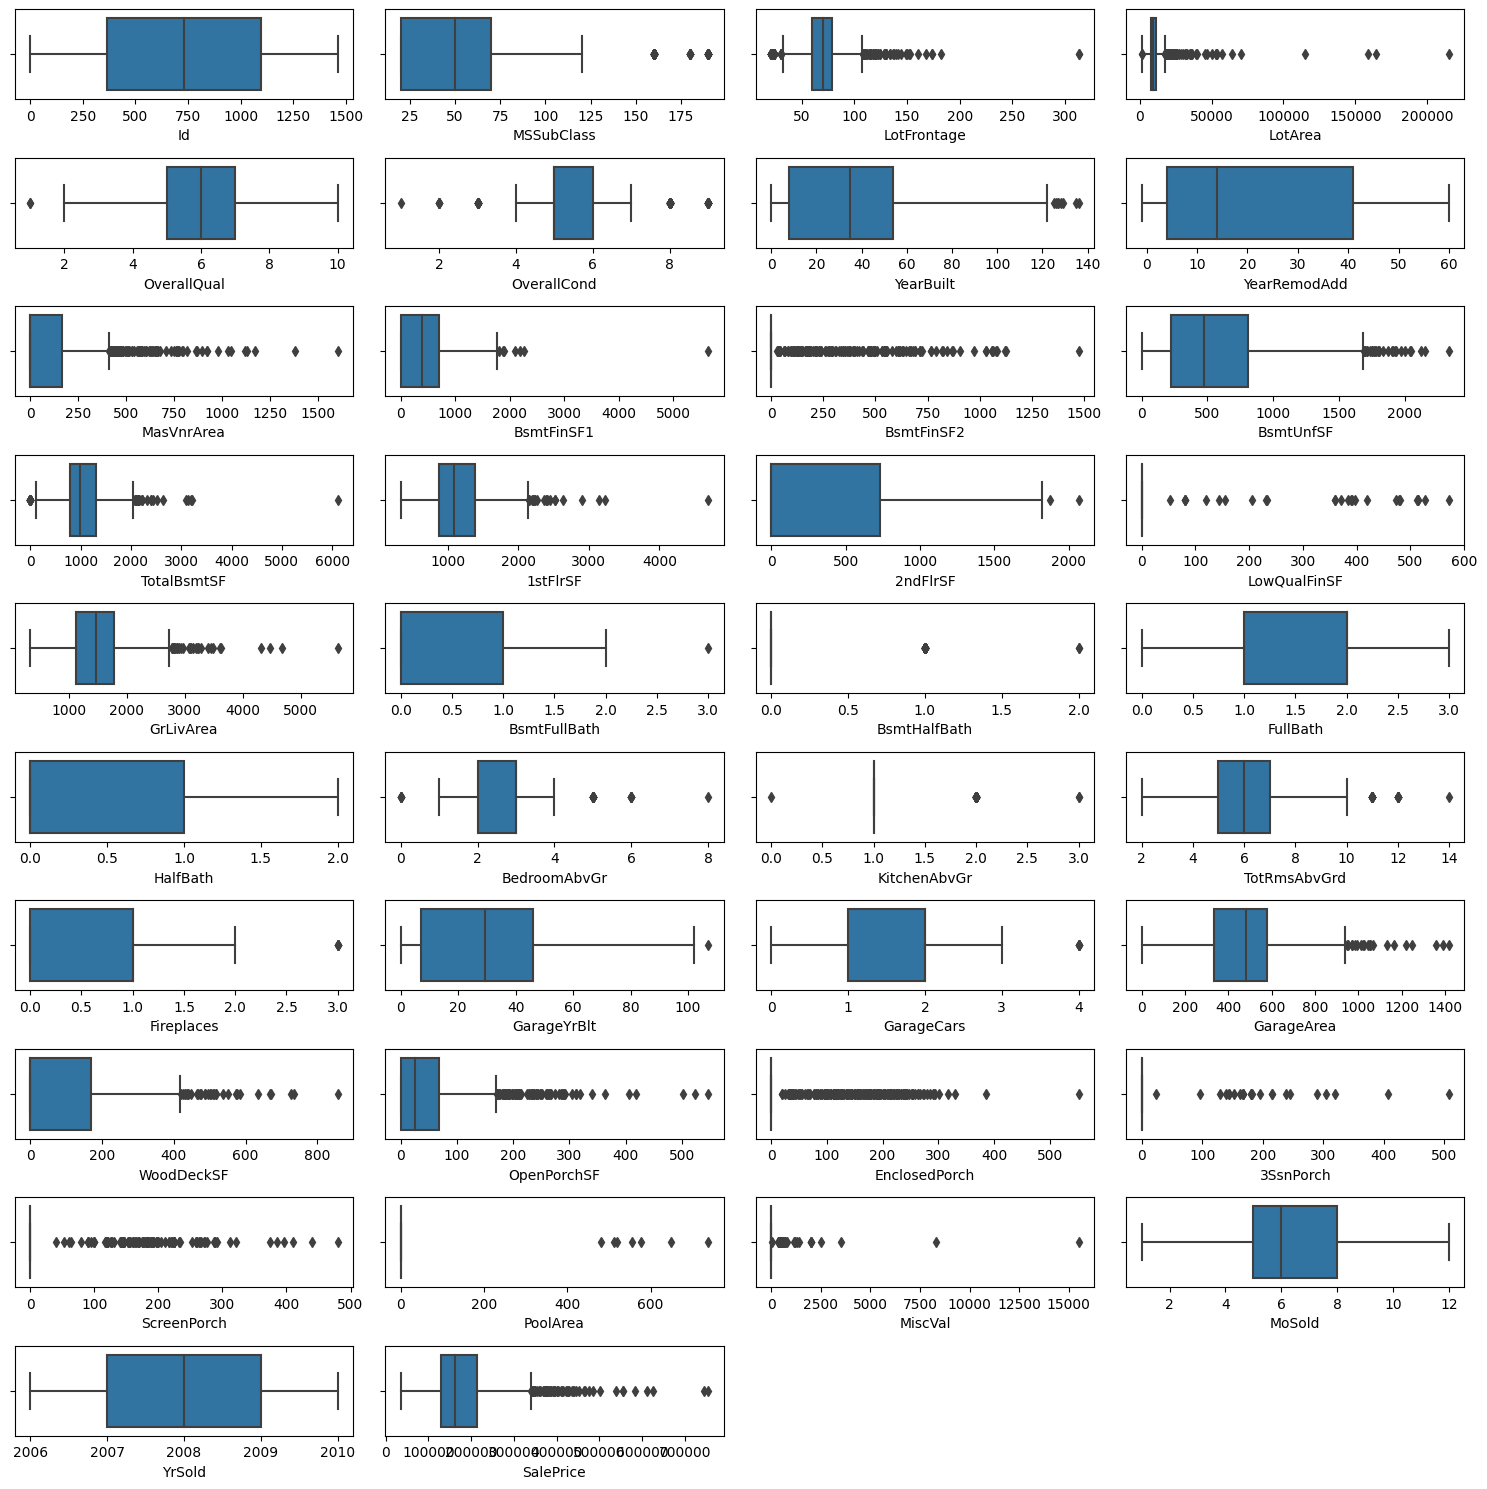

In [ ]:
#visualizing the numerical data using the boxplot
plt.figure(figsize=(15,15))
plt_no=1
for i in data.columns:
    if data[i].dtype!='object':
        plt.subplot(10,4,plt_no)
        sns.boxplot(x=i,data=data)
        plt.xlabel=i
        plt_no+=1
plt.tight_layout()



*   checked for upper limit and lower limit of columns




In [ ]:
#calculating the upper and lower limits of all numerical data
for i in data.columns[1:]:
    if data[i].dtype!='object':
        
        Q1=data[i].quantile(0.25)
        Q3=data[i].quantile(0.75)

        IQR=Q3-Q1

        lower_lim=Q1-1.5*IQR
        upper_lim=Q3+1.5*IQR
        
        print(f'lower limit of {i} ------> {lower_lim}')
        print(f'upper limit of {i} ------> {upper_lim}')
        print('===================================')

        
    

lower limit of MSSubClass ------> -55.0
upper limit of MSSubClass ------> 145.0
lower limit of LotFrontage ------> 31.5
upper limit of LotFrontage ------> 107.5
lower limit of LotArea ------> 1481.5
upper limit of LotArea ------> 17673.5
lower limit of OverallQual ------> 2.0
upper limit of OverallQual ------> 10.0
lower limit of OverallCond ------> 3.5
upper limit of OverallCond ------> 7.5
lower limit of YearBuilt ------> -61.0
upper limit of YearBuilt ------> 123.0
lower limit of YearRemodAdd ------> -51.5
upper limit of YearRemodAdd ------> 96.5
lower limit of MasVnrArea ------> -246.375
upper limit of MasVnrArea ------> 410.625
lower limit of BsmtFinSF1 ------> -1068.375
upper limit of BsmtFinSF1 ------> 1780.625
lower limit of BsmtFinSF2 ------> 0.0
upper limit of BsmtFinSF2 ------> 0.0
lower limit of BsmtUnfSF ------> -654.5
upper limit of BsmtUnfSF ------> 1685.5
lower limit of TotalBsmtSF ------> 42.0
upper limit of TotalBsmtSF ------> 2052.0
lower limit of 1stFlrSF ------> 11



*   found the number of rows missing with outliers range



In [ ]:
#calculating the number of lost rows if we use upper and lower limits
for i in data.columns[1:]:
  if data[i].dtype!='object':

        Q1=data[i].quantile(0.25)
        Q3=data[i].quantile(0.75)

        IQR=Q3-Q1

        lower_lim=Q1-1.5*IQR
        upper_lim=Q3+1.5*IQR

        out_data=data.loc[(data[i]>lower_lim) & (data[i]<upper_lim)]

        print(f'no of rows lost in {i} ------> {len(data)-len(out_data)}')


no of rows lost in MSSubClass ------> 103
no of rows lost in LotFrontage ------> 106
no of rows lost in LotArea ------> 69
no of rows lost in OverallQual ------> 23
no of rows lost in OverallCond ------> 125
no of rows lost in YearBuilt ------> 8
no of rows lost in YearRemodAdd ------> 0
no of rows lost in MasVnrArea ------> 98
no of rows lost in BsmtFinSF1 ------> 7
no of rows lost in BsmtFinSF2 ------> 1460
no of rows lost in BsmtUnfSF ------> 29
no of rows lost in TotalBsmtSF ------> 61
no of rows lost in 1stFlrSF ------> 20
no of rows lost in 2ndFlrSF ------> 2
no of rows lost in LowQualFinSF ------> 1460
no of rows lost in GrLivArea ------> 31
no of rows lost in BsmtFullBath ------> 1
no of rows lost in BsmtHalfBath ------> 1460
no of rows lost in FullBath ------> 0
no of rows lost in HalfBath ------> 0
no of rows lost in BedroomAbvGr ------> 35
no of rows lost in KitchenAbvGr ------> 1460
no of rows lost in TotRmsAbvGrd ------> 78
no of rows lost in Fireplaces ------> 5
no of row

In [ ]:
f=[]
for i in data.columns[1:]:
  if data[i].dtype!='object':

        Q1=data[i].quantile(0.25)
        Q3=data[i].quantile(0.75)

        IQR=Q3-Q1

        lower_lim=Q1-1.5*IQR
        upper_lim=Q3+1.5*IQR

        out_df1=data.loc[(data[i]>lower_lim) & (data[i]<upper_lim)]

        lngt=len(data)-len(out_df1)

        f.append(lngt)

        


In [ ]:
len(f)

37

In [ ]:
outlier_data=pd.DataFrame({'column_names':numerical_cols[1:],'outlier_count':f0
                          169-})

In [ ]:
outlier_data.head()

,column_names,outlier_count
0,MSSubClass,103
1,LotFrontage,106
2,LotArea,69
3,OverallQual,23
4,OverallCond,125


In [ ]:
outlier_data['per_oulier']=100*(outlier_data['outlier_count']/len(data))

In [ ]:
outlier_data

,column_names,outlier_count,per_oulier
0,MSSubClass,103,7.054795
1,LotFrontage,106,7.260274
2,LotArea,69,4.726027
3,OverallQual,23,1.575342
4,OverallCond,125,8.561644
5,YearBuilt,8,0.547945
6,YearRemodAdd,0,0.000000
7,MasVnrArea,98,6.712329
8,BsmtFinSF1,7,0.479452
9,BsmtFinSF2,1460,100.000000


In [ ]:
data.drop(outlier_data[outlier_data['per_oulier']==100]['column_names'],axis=1,inplace=True)


In [ ]:
data.shape

(1460, 68)

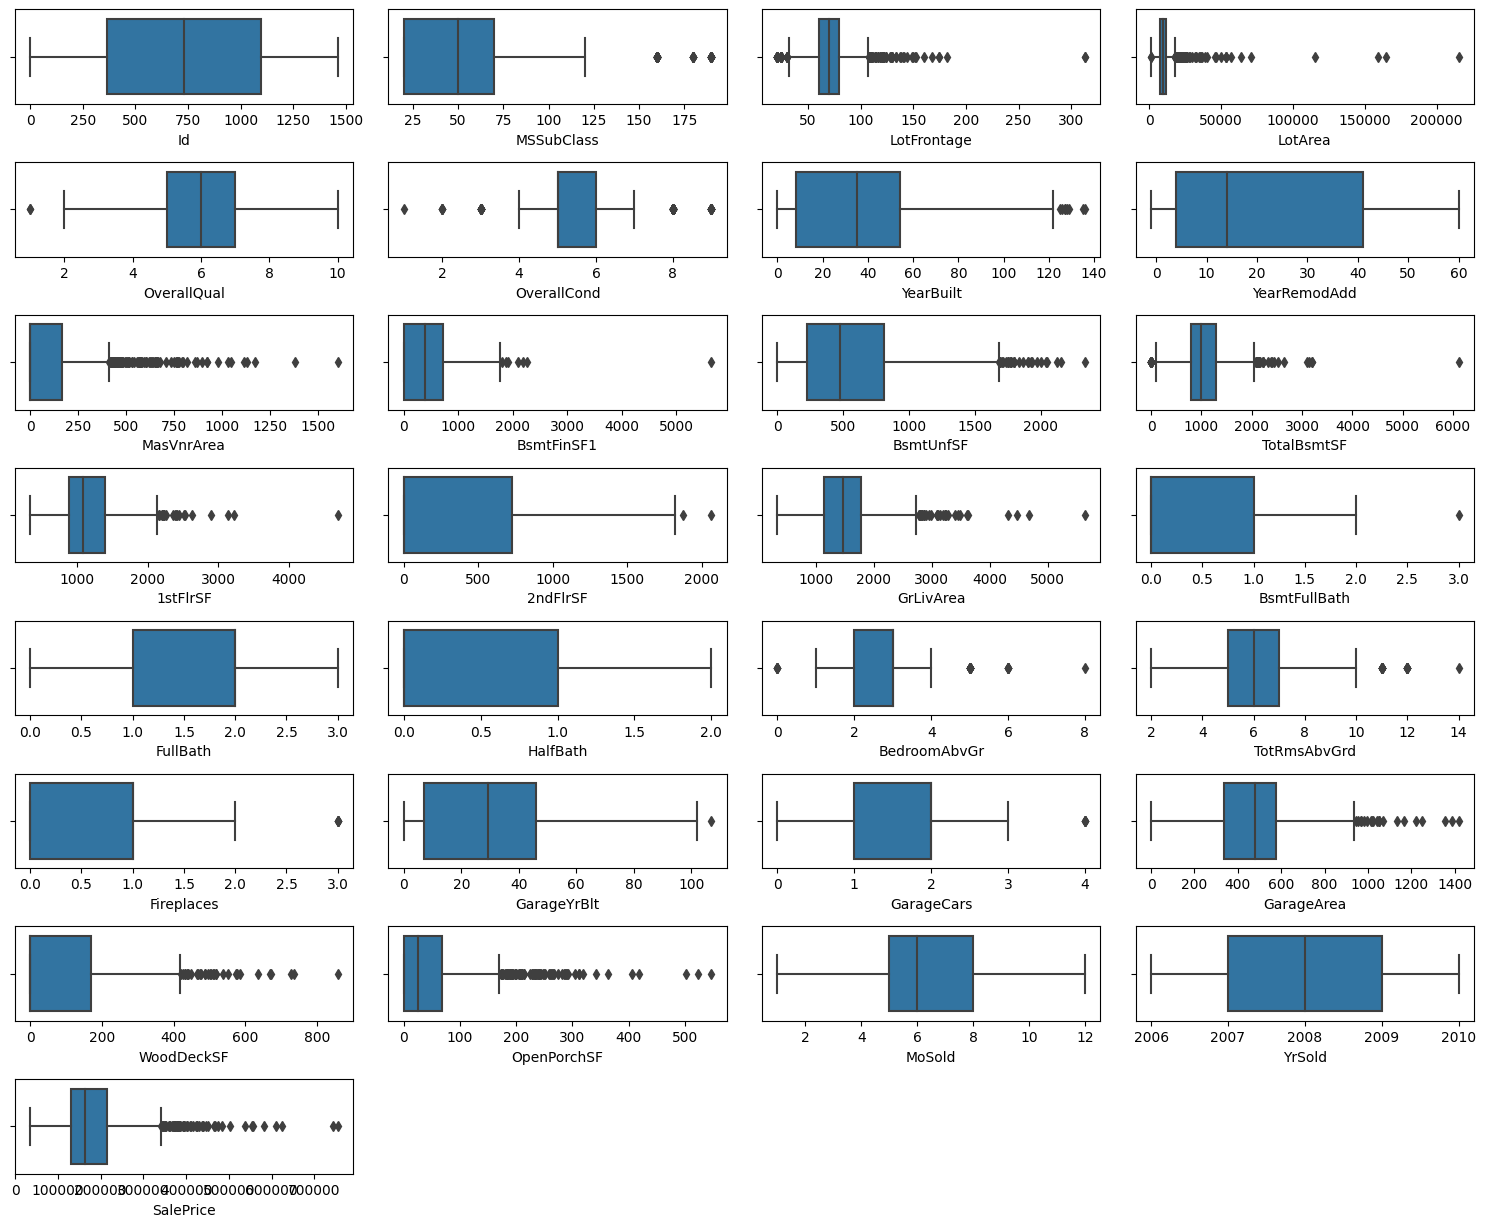

In [ ]:
plt.figure(figsize=(15,15))
plt_no=1
for i in data.columns:
    if data[i].dtype!='object':
        plt.subplot(10,4,plt_no)
        sns.boxplot(x=i,data=data)
        plt.xlabel=i
        plt_no+=1
plt.tight_layout()

In [ ]:
outlier_data.loc[(outlier_data['per_oulier']>0) & (outlier_data['per_oulier']<100)]

,column_names,outlier_count,per_oulier
0,MSSubClass,103,7.054795
1,LotFrontage,106,7.260274
2,LotArea,69,4.726027
3,OverallQual,23,1.575342
4,OverallCond,125,8.561644
5,YearBuilt,8,0.547945
7,MasVnrArea,98,6.712329
8,BsmtFinSF1,7,0.479452
10,BsmtUnfSF,29,1.986301
11,TotalBsmtSF,61,4.178082


In [ ]:
data.shape

(1460, 68)

#outlier elimination



*   ``eliminating the outliers`` manually by choosing the limits manually after visualizing the boxplots



In [ ]:
print(len(data.loc[data['MSSubClass']>145]))


103


In [ ]:
data.drop(data.loc[data['MSSubClass']>145].index,inplace=True)

In [ ]:
data.shape

(1357, 68)

In [ ]:
print(len(data.loc[data['LotFrontage']>100]))


83


In [ ]:
data.drop(data[data['LotFrontage']>100].index,inplace=True)

In [ ]:
data.shape

(1274, 68)

In [ ]:
print(len(data.loc[data['LotArea']>18000]))


45


In [ ]:
# data[data['LotArea']>100000].index

In [ ]:
data.drop(data[data['LotArea']>18000].index,inplace=True)

In [ ]:
print(len(data.loc[(data['OverallCond']<4) | (data['OverallCond']>7)]))


107


In [ ]:
data.drop(data.loc[(data['OverallCond']<4) | (data['OverallCond']>7)].index,inplace=True)

In [ ]:
print(len(data.loc[data['MasVnrArea']>450]))


49


In [ ]:
data.drop(data.loc[data['MasVnrArea']>450].index,inplace=True)

In [ ]:
data.shape

(1073, 68)

In [ ]:
print(len(data.loc[data['TotRmsAbvGrd']>10]))


16


In [ ]:
data.drop(data.loc[data['TotRmsAbvGrd']>10].index,inplace=True)

In [ ]:
print(len(data.loc[data['OpenPorchSF']>170]))

46


In [ ]:
data.drop(data.loc[data['OpenPorchSF']>170].index,inplace=True)

In [ ]:
data.shape

(1011, 68)

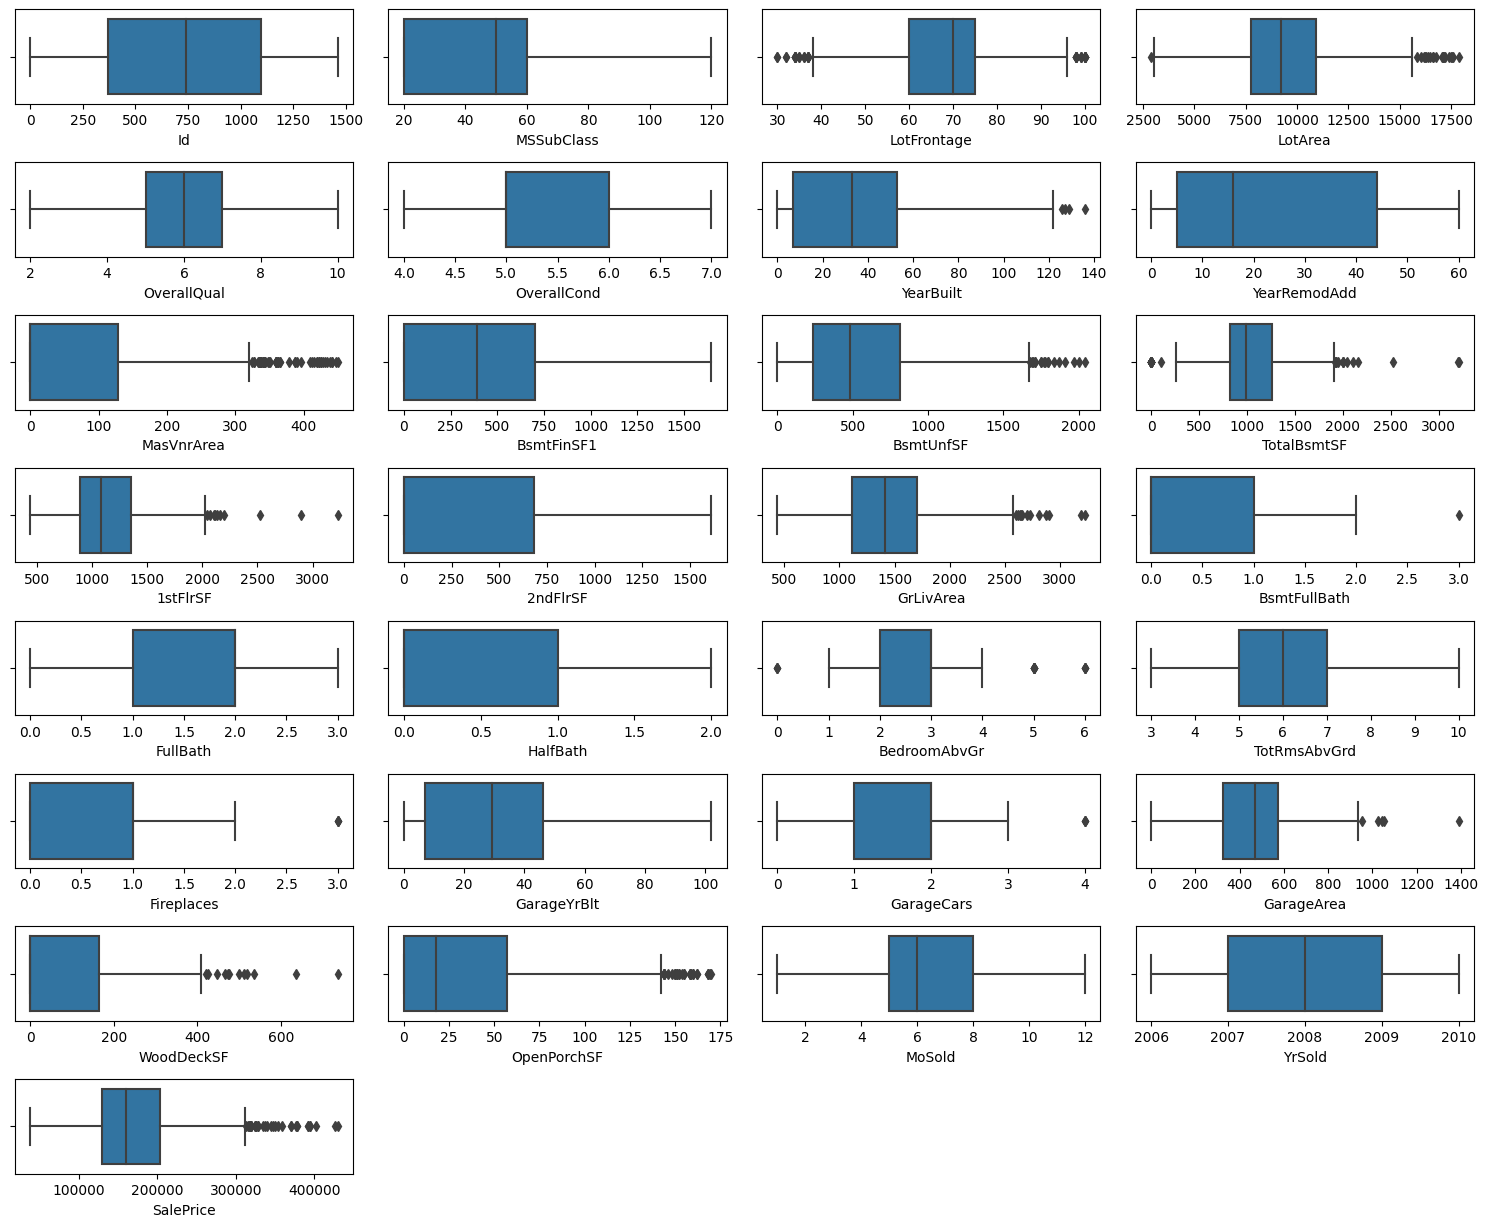

In [ ]:
plt.figure(figsize=(15,15))
plt_no=1
for i in data.columns:
    if data[i].dtype!='object':
        plt.subplot(10,4,plt_no)
        sns.boxplot(x=i,data=data)
        plt.xlabel=i
        plt_no+=1
plt.tight_layout()

#encoding- Label encoder

*  using `Labelencoder` because there are already lot of features exit in the data and doing the onehot encoding or getdummies method will result in formation of additional columns again which will lead to `curse of dimensionality` thats why choosing the labelencoder

In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder=LabelEncoder()

In [ ]:
for i in data.columns:
  if data[i].dtype=='object':
    data[i]=encoder.fit_transform(data[i])

In [ ]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,65.0,8450,1,3,3,0,4,0,3,2,1,0,4,7,5,5,5,1,0,11,12,1,196.0,2,2,2,2,2,3,2,706,5,150,856,1,0,1,3,856,854,1710,1,2,1,3,2,8,5,0,2,1,5.0,1,2,548,4,4,2,0,61,2,2008,8,4,208500
2,3,60,3,68.0,11250,1,0,3,0,4,0,3,2,1,0,4,7,5,7,6,1,0,11,12,1,162.0,2,2,2,2,2,2,2,486,5,434,920,1,0,1,3,920,866,1786,1,2,1,3,2,6,5,1,4,1,7.0,1,2,608,4,4,2,0,42,9,2008,8,4,223500
3,4,70,3,60.0,9550,1,0,3,0,0,0,4,2,1,0,4,7,5,91,36,1,0,12,14,2,0.0,3,2,0,3,1,3,0,216,5,540,756,1,2,1,3,961,756,1717,1,1,0,3,2,7,5,1,2,5,8.0,2,3,642,4,4,2,0,35,2,2006,8,0,140000
4,5,60,3,84.0,14260,1,0,3,0,2,0,13,2,1,0,4,8,5,8,8,1,0,11,12,1,350.0,2,2,2,2,2,0,2,655,5,490,1145,1,0,1,3,1145,1053,2198,1,2,1,4,2,9,5,1,4,1,8.0,1,3,836,4,4,2,192,84,12,2008,8,4,250000
5,6,50,3,85.0,14115,1,0,3,0,4,0,9,2,1,0,0,5,5,16,14,1,0,11,12,2,0.0,3,2,5,2,2,3,2,732,5,64,796,1,0,1,3,796,566,1362,1,1,1,1,3,5,5,0,2,1,16.0,2,2,480,4,4,2,40,30,10,2009,8,4,143000


In [ ]:
data.shape

(1011, 68)

#Feature selection

##method 1

<Axes: >

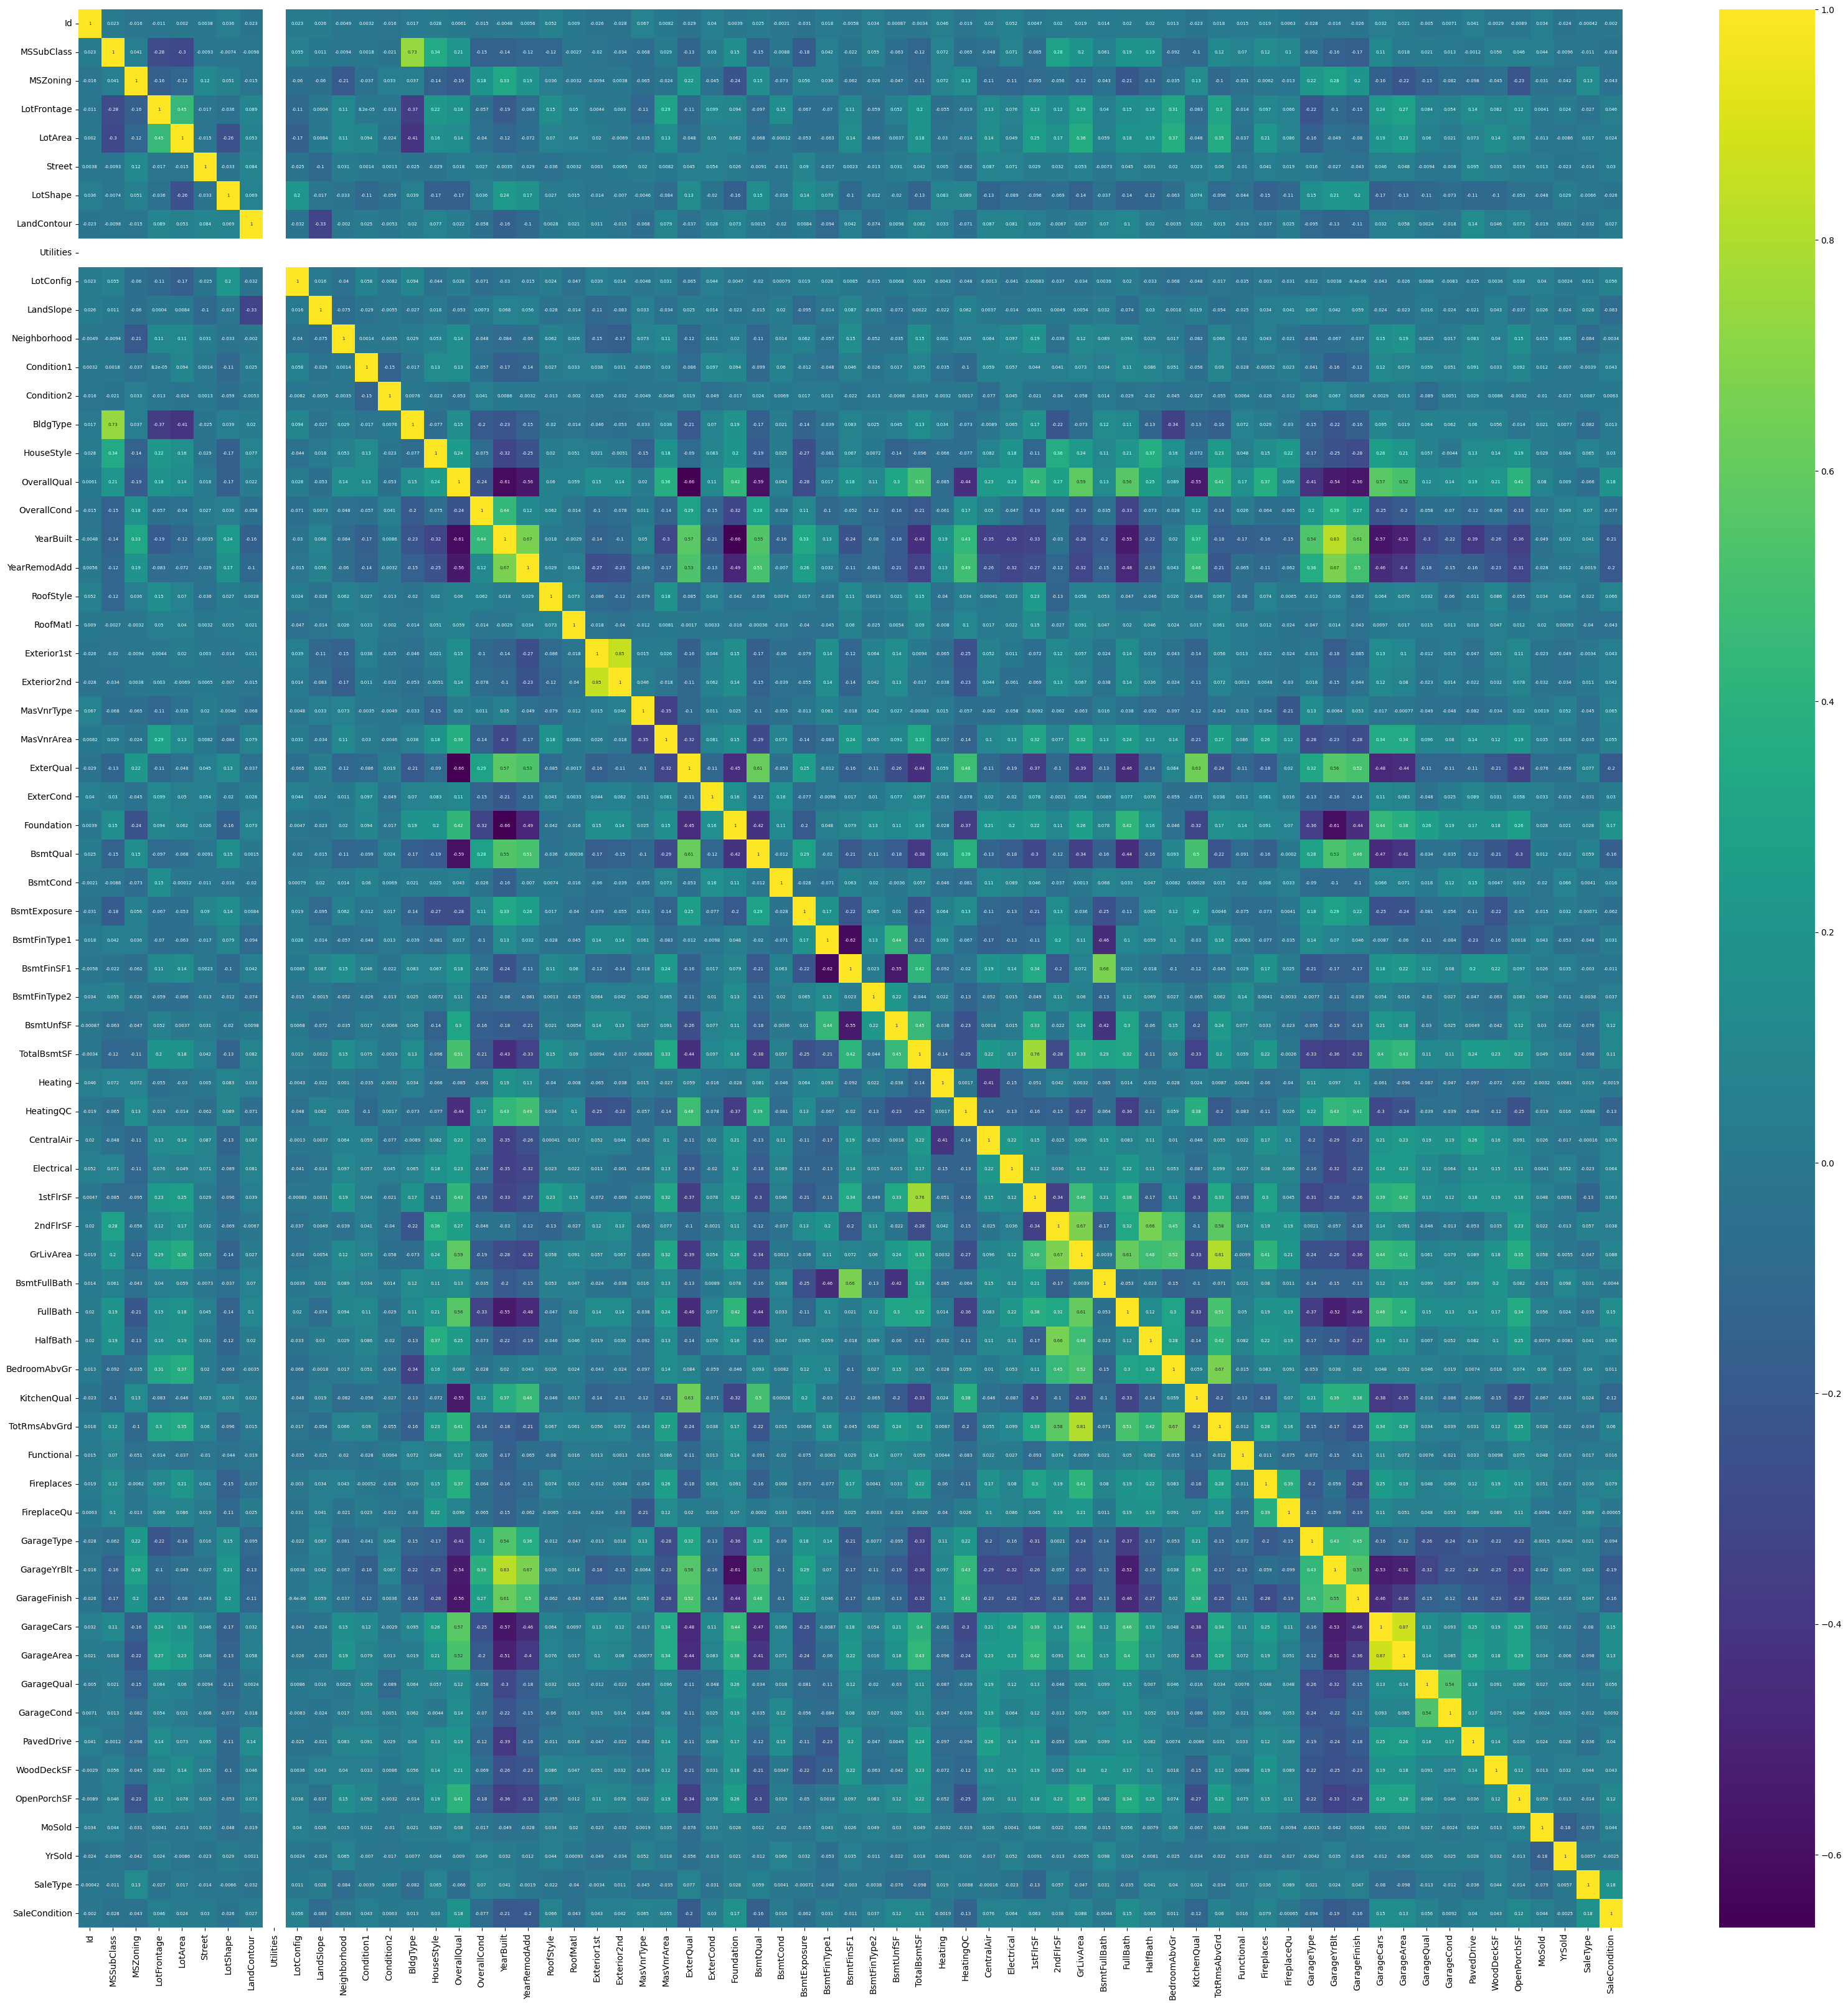

In [ ]:
plt.figure(figsize=(40,40))
sns.heatmap(data.iloc[:,:-1].corr(),annot=True,annot_kws={'size':5},cmap='viridis')

In [ ]:
data.drop('Id',axis=1,inplace=True)

In [ ]:
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,3,65.0,8450,1,3,3,0,4,0,3,2,1,0,4,7,5,5,5,1,0,11,12,1,196.0,2,2,2,2,2,3,2,706,5,150,856,1,0,1,3,856,854,1710,1,2,1,3,2,8,5,0,2,1,5.0,1,2,548,4,4,2,0,61,2,2008,8,4,208500
2,60,3,68.0,11250,1,0,3,0,4,0,3,2,1,0,4,7,5,7,6,1,0,11,12,1,162.0,2,2,2,2,2,2,2,486,5,434,920,1,0,1,3,920,866,1786,1,2,1,3,2,6,5,1,4,1,7.0,1,2,608,4,4,2,0,42,9,2008,8,4,223500
3,70,3,60.0,9550,1,0,3,0,0,0,4,2,1,0,4,7,5,91,36,1,0,12,14,2,0.0,3,2,0,3,1,3,0,216,5,540,756,1,2,1,3,961,756,1717,1,1,0,3,2,7,5,1,2,5,8.0,2,3,642,4,4,2,0,35,2,2006,8,0,140000
4,60,3,84.0,14260,1,0,3,0,2,0,13,2,1,0,4,8,5,8,8,1,0,11,12,1,350.0,2,2,2,2,2,0,2,655,5,490,1145,1,0,1,3,1145,1053,2198,1,2,1,4,2,9,5,1,4,1,8.0,1,3,836,4,4,2,192,84,12,2008,8,4,250000
5,50,3,85.0,14115,1,0,3,0,4,0,9,2,1,0,0,5,5,16,14,1,0,11,12,2,0.0,3,2,5,2,2,3,2,732,5,64,796,1,0,1,3,796,566,1362,1,1,1,1,3,5,5,0,2,1,16.0,2,2,480,4,4,2,40,30,10,2009,8,4,143000


In [ ]:
X=data.drop('SalePrice',axis=1)
y=data['SalePrice']

In [ ]:
X.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,MoSold,YrSold,SaleType,SaleCondition
0,60,3,65.0,8450,1,3,3,0,4,0,3,2,1,0,4,7,5,5,5,1,0,11,12,1,196.0,2,2,2,2,2,3,2,706,5,150,856,1,0,1,3,856,854,1710,1,2,1,3,2,8,5,0,2,1,5.0,1,2,548,4,4,2,0,61,2,2008,8,4
2,60,3,68.0,11250,1,0,3,0,4,0,3,2,1,0,4,7,5,7,6,1,0,11,12,1,162.0,2,2,2,2,2,2,2,486,5,434,920,1,0,1,3,920,866,1786,1,2,1,3,2,6,5,1,4,1,7.0,1,2,608,4,4,2,0,42,9,2008,8,4
3,70,3,60.0,9550,1,0,3,0,0,0,4,2,1,0,4,7,5,91,36,1,0,12,14,2,0.0,3,2,0,3,1,3,0,216,5,540,756,1,2,1,3,961,756,1717,1,1,0,3,2,7,5,1,2,5,8.0,2,3,642,4,4,2,0,35,2,2006,8,0
4,60,3,84.0,14260,1,0,3,0,2,0,13,2,1,0,4,8,5,8,8,1,0,11,12,1,350.0,2,2,2,2,2,0,2,655,5,490,1145,1,0,1,3,1145,1053,2198,1,2,1,4,2,9,5,1,4,1,8.0,1,3,836,4,4,2,192,84,12,2008,8,4
5,50,3,85.0,14115,1,0,3,0,4,0,9,2,1,0,0,5,5,16,14,1,0,11,12,2,0.0,3,2,5,2,2,3,2,732,5,64,796,1,0,1,3,796,566,1362,1,1,1,1,3,5,5,0,2,1,16.0,2,2,480,4,4,2,40,30,10,2009,8,4


In [ ]:
y.head()

0    208500
2    223500
3    140000
4    250000
5    143000
Name: SalePrice, dtype: int64

##method 2

In [ ]:
from sklearn.feature_selection import SelectKBest,chi2

In [ ]:
top_features=SelectKBest(score_func=chi2,k=50)
top_ranked_features=top_features.fit(X,y)

In [ ]:
top_ranked_features.scores_

array([1.00364602e+04, 7.18347519e+01, 1.48981479e+03, 4.73522571e+05,
       1.33201189e+00, 6.01195626e+02, 9.45687790e+01,            nan,
       4.03007511e+02, 5.50947399e+02, 2.00906573e+03, 1.70021393e+02,
       6.60958016e+00, 1.73698596e+03, 4.27839019e+02, 2.30511263e+02,
       6.20788303e+01, 1.81925308e+04, 1.23368871e+04, 2.40849747e+02,
       1.00080536e+03, 5.83700745e+02, 6.46806046e+02, 1.20439372e+02,
       1.09078849e+05, 1.14863209e+02, 2.97893895e+01, 2.30508781e+02,
       2.06679900e+02, 3.73802999e+01, 3.33840133e+02, 5.72931353e+02,
       2.43841456e+05, 8.38109537e+01, 1.94620096e+05, 1.00667894e+05,
       5.94839075e+01, 1.13377821e+03, 3.56827819e+01, 1.19775325e+02,
       6.52330882e+04, 3.31956208e+05, 9.28092331e+04, 3.41881622e+02,
       1.30381351e+02, 4.37800943e+02, 1.01401452e+02, 1.80532890e+02,
       1.83294319e+02, 3.53815105e+01, 3.98307972e+02, 1.61889696e+02,
       8.07601681e+02, 1.38266287e+04, 3.60717010e+02, 2.05652347e+02,
      

In [ ]:
top_df=pd.DataFrame(top_ranked_features.scores_,columns=['scores'])
top_df.head()

,scores
0,10036.460220
1,71.834752
2,1489.814794
3,473522.571456
4,1.332012


In [ ]:
top_df['columns']=X.columns

In [ ]:
top_df.head()

,scores,columns
0,10036.460220,MSSubClass
1,71.834752,MSZoning
2,1489.814794,LotFrontage
3,473522.571456,LotArea
4,1.332012,Street


In [ ]:
sorted_df=top_df.nlargest(50,'scores')

<Axes: xlabel='scores', ylabel='columns'>

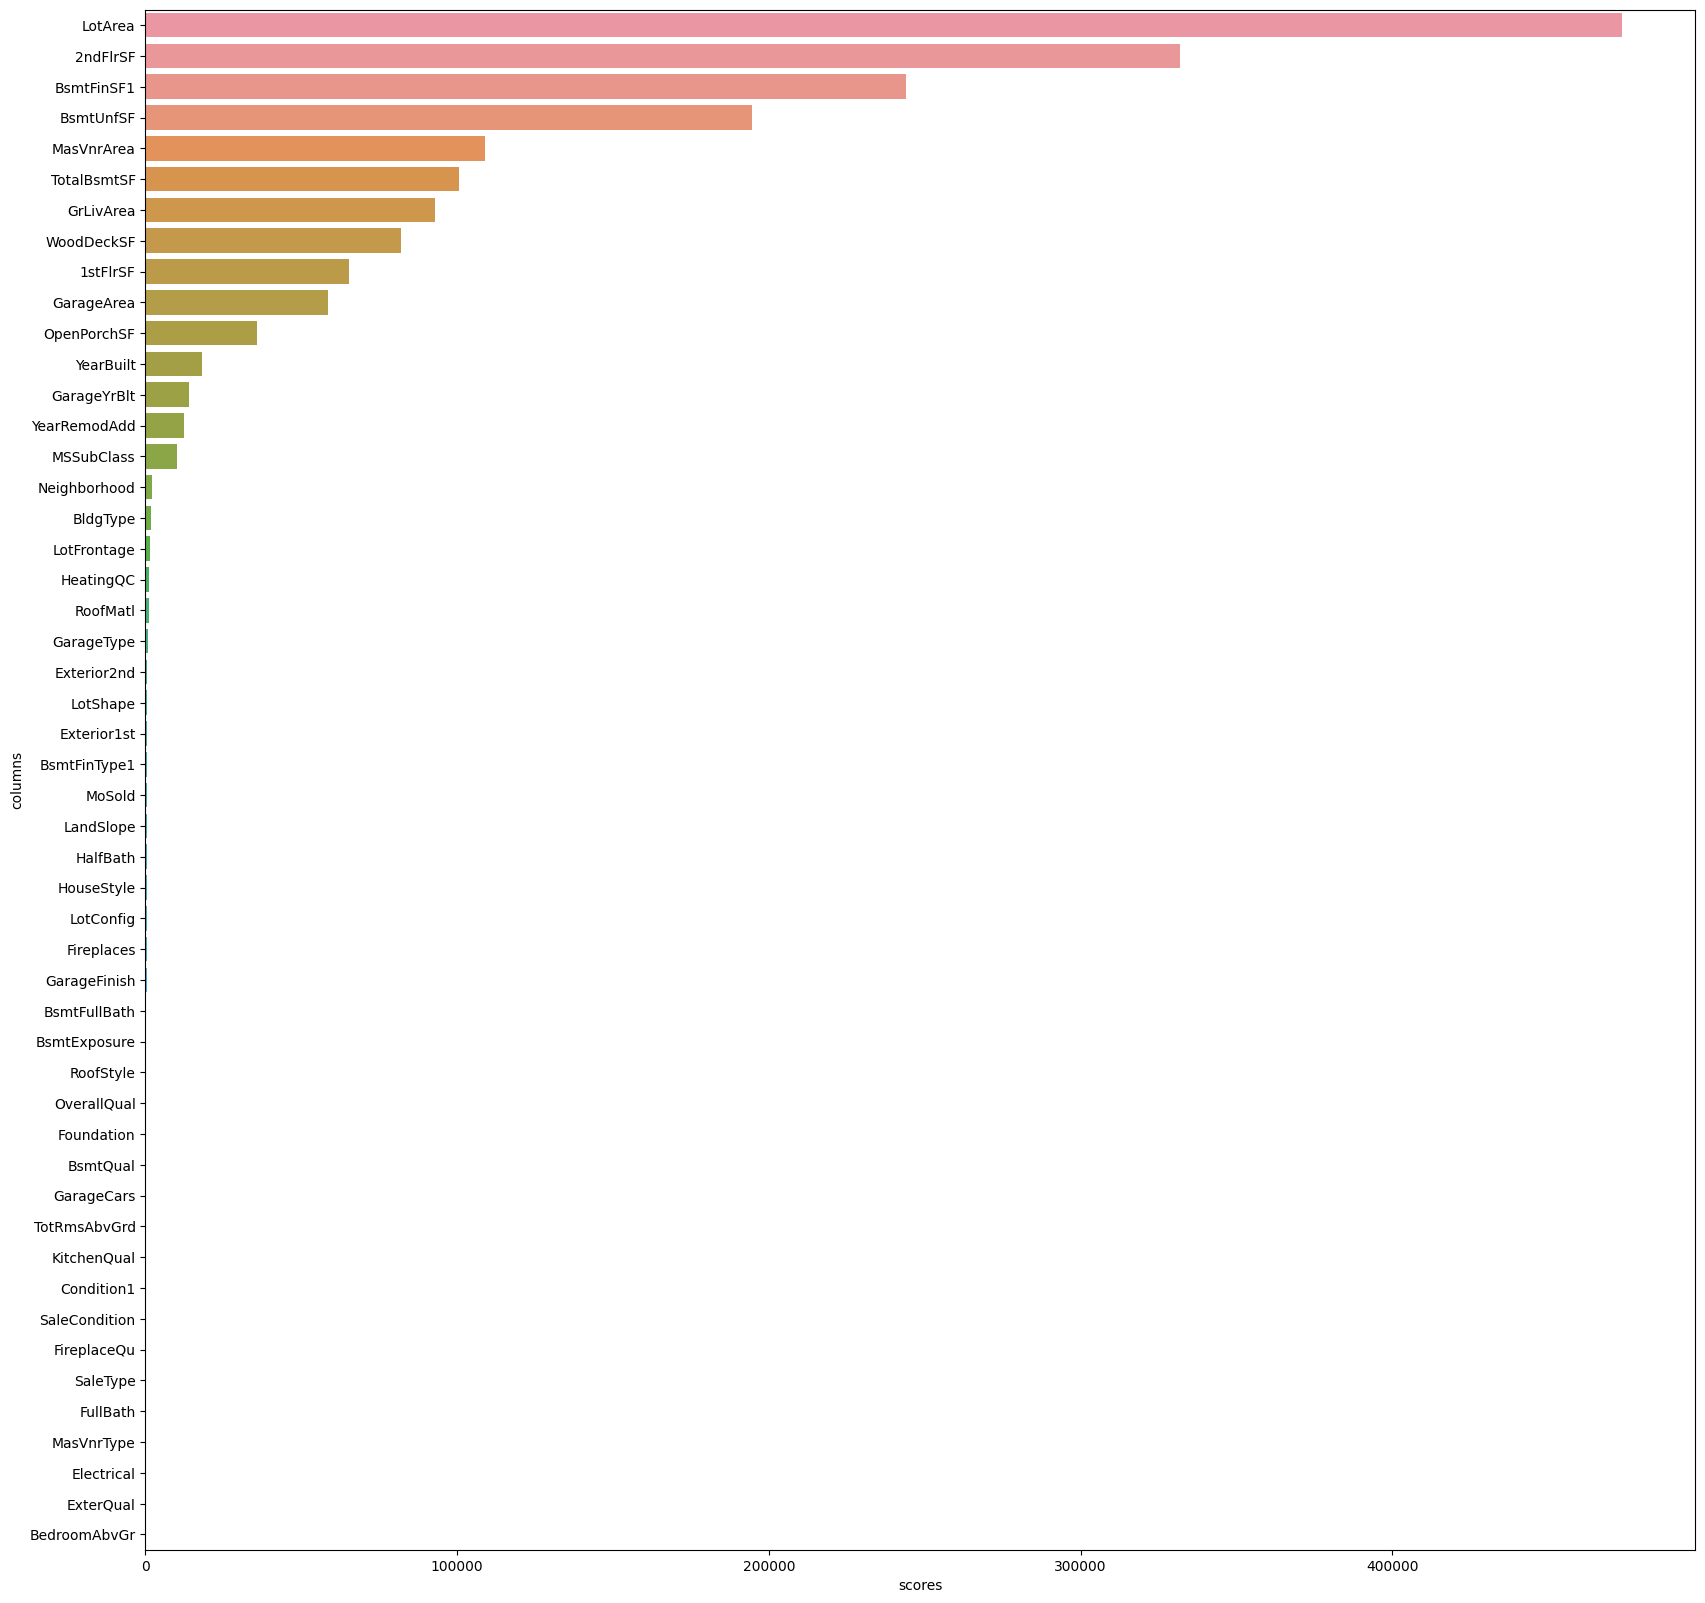

In [ ]:
plt.figure(figsize=(20,20))
sns.barplot(sorted_df,x=sorted_df['scores'],y=sorted_df['columns'])

##method 3

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
model=ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier()

In [ ]:
model.feature_importances_

array([0.01655399, 0.00954835, 0.02941033, 0.0307738 , 0.00017378,
       0.01603396, 0.00698257, 0.        , 0.01701815, 0.00308983,
       0.02406244, 0.0095511 , 0.00051231, 0.00533078, 0.01312635,
       0.02202714, 0.01524359, 0.02882087, 0.02863774, 0.0116553 ,
       0.00047535, 0.0203962 , 0.02050862, 0.01445058, 0.01981693,
       0.00853554, 0.0068655 , 0.01132947, 0.01166179, 0.00553455,
       0.01646186, 0.02113212, 0.02655631, 0.00784791, 0.03028839,
       0.03004882, 0.00131579, 0.01656989, 0.00369665, 0.00602686,
       0.03022209, 0.01631357, 0.03059037, 0.0158912 , 0.00914537,
       0.01165897, 0.01639865, 0.01230416, 0.02380635, 0.00402748,
       0.01676786, 0.01311279, 0.01230702, 0.02766128, 0.01550485,
       0.01432382, 0.02893872, 0.00300208, 0.00241481, 0.00440647,
       0.02352278, 0.02311845, 0.02955758, 0.02789686, 0.00793776,
       0.01109716])

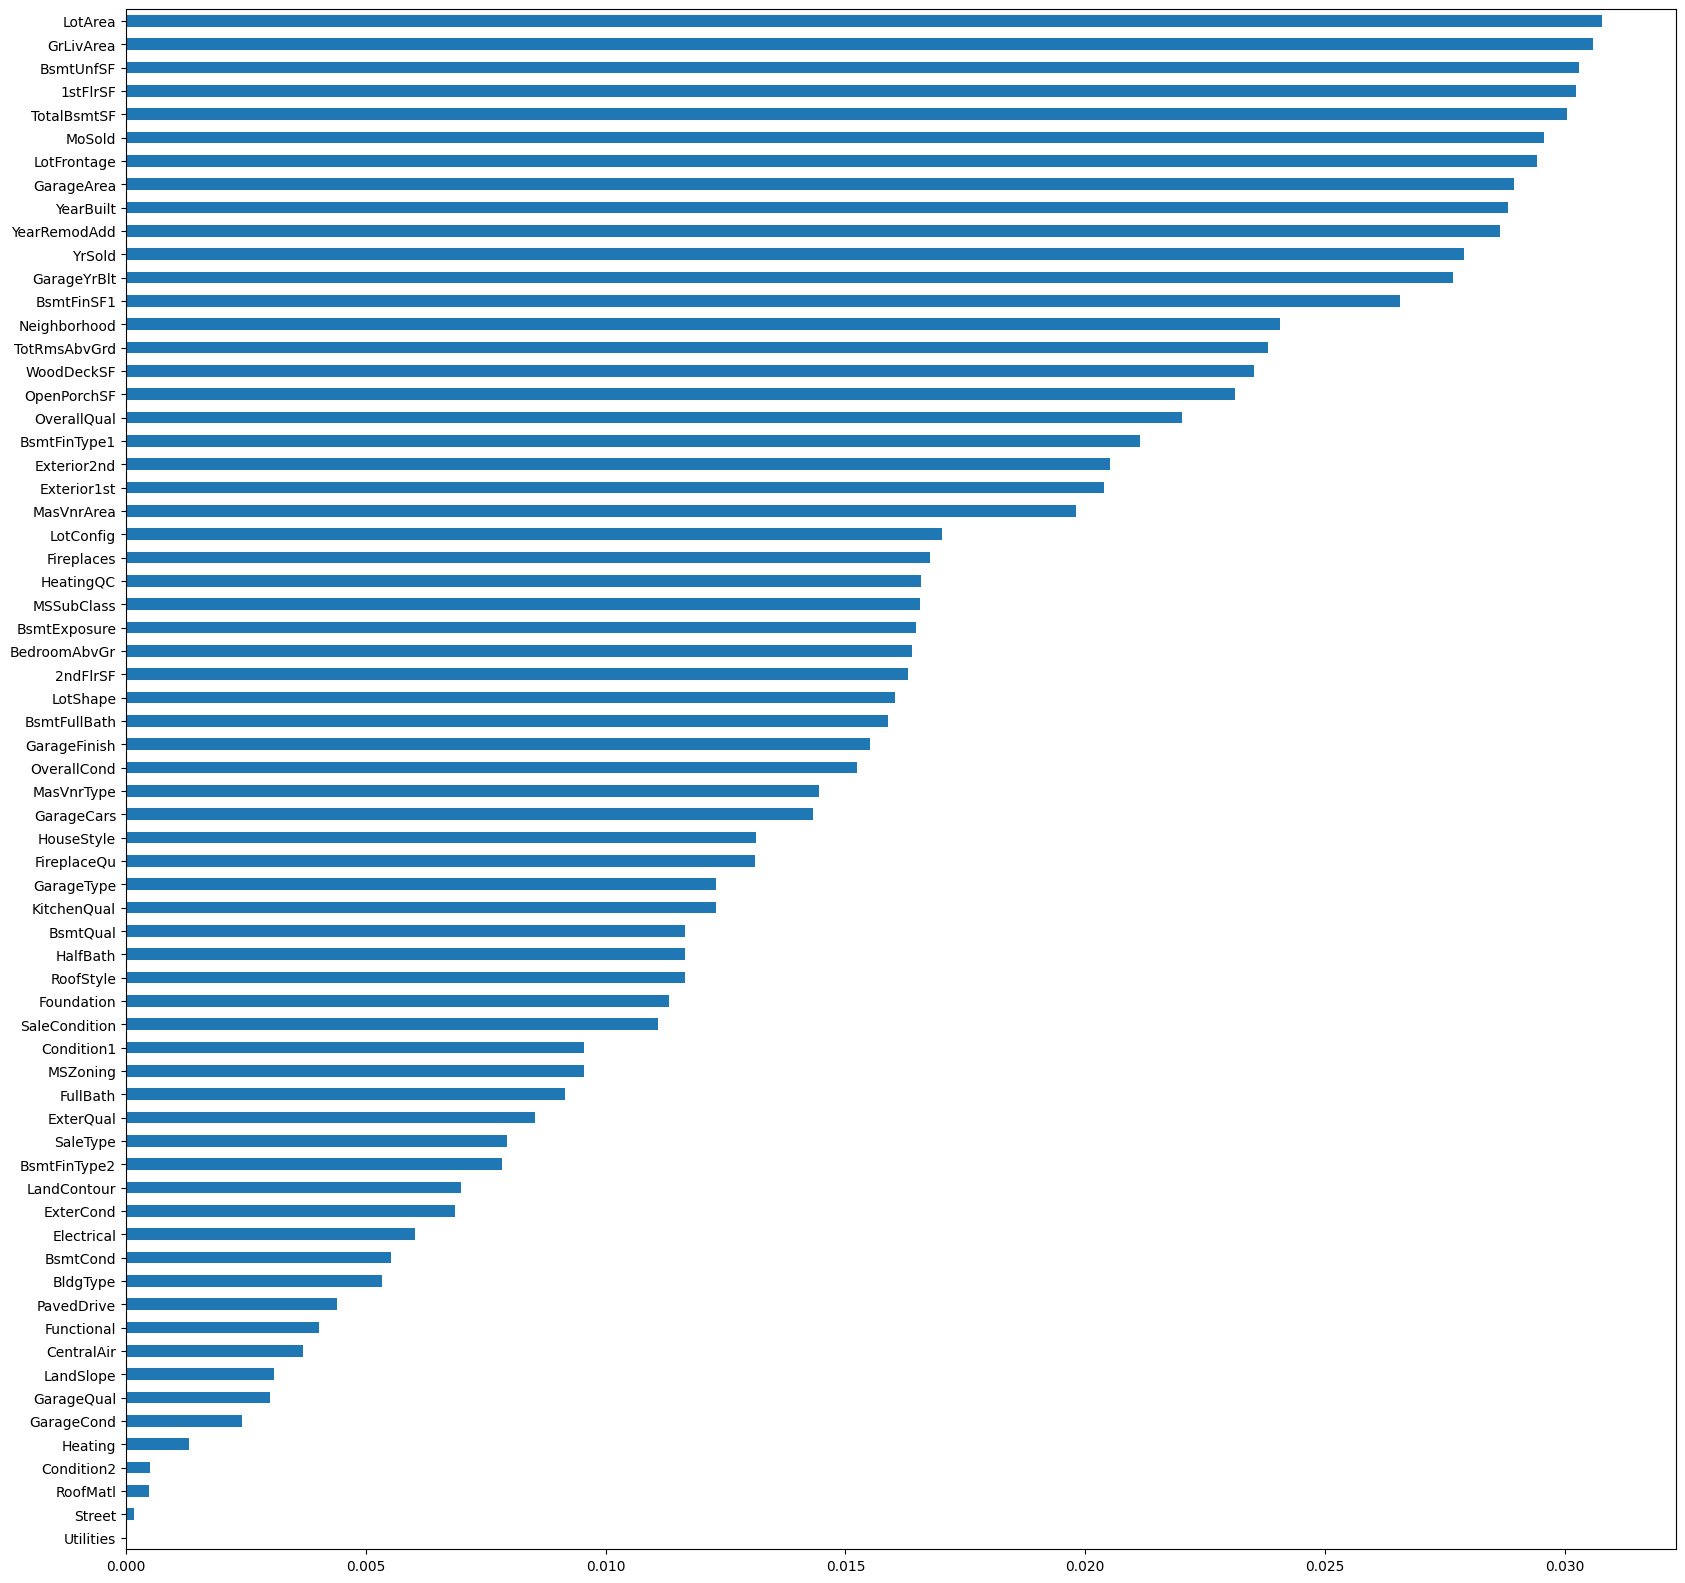

In [ ]:
plt.figure(figsize=(20,20))
ranked_features=pd.Series(model.feature_importances_,index=X.columns)
ranked_features.sort_values(ascending=True).plot(kind='barh')
plt.show()

##method 4

In [ ]:
from sklearn.feature_selection import mutual_info_regression

In [ ]:
mutual_info=mutual_info_regression(X,y)

<Axes: >

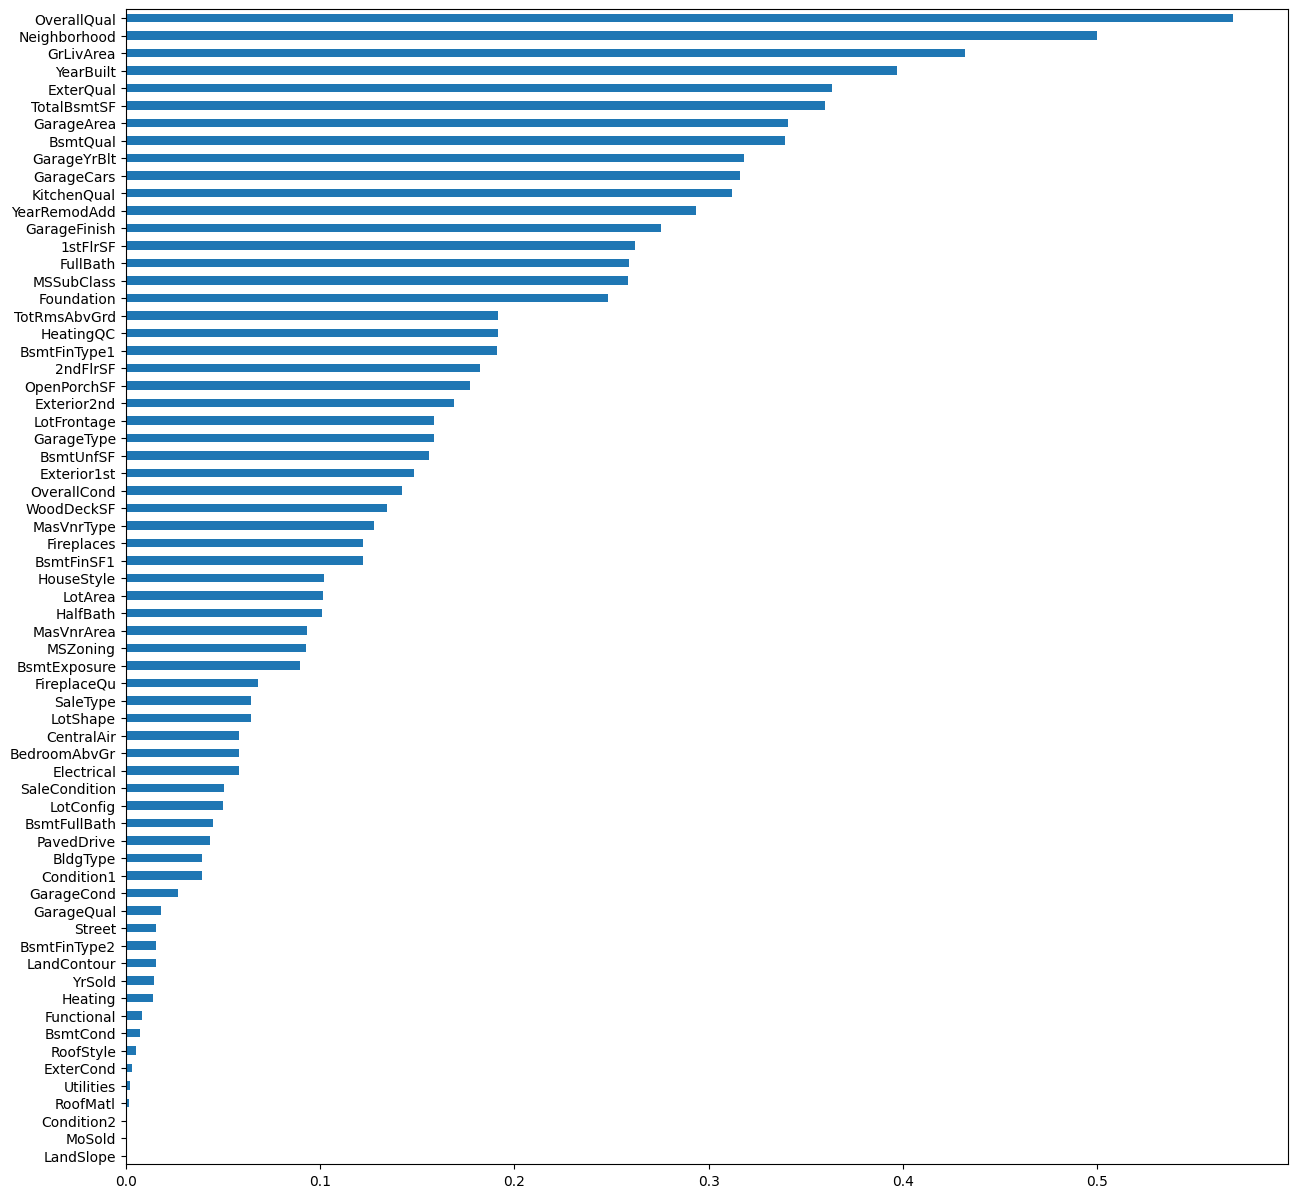

In [ ]:
plt.figure(figsize=(15,15))
mutual_data=pd.Series(mutual_info,index=X.columns)
mutual_data.sort_values(ascending=True).plot(kind='barh')



In [ ]:
len(mutual_data.sort_values(ascending=False))

66




---



---


*  out of 4 type o feature selection techniques `mutual-info` method tends to be the best performing one, so selcting the features based on it.

---



In [ ]:
mutual_data.sort_values(ascending=False)

OverallQual      0.569868
Neighborhood     0.499663
GrLivArea        0.432083
YearBuilt        0.396762
ExterQual        0.363277
TotalBsmtSF      0.360004
GarageArea       0.340601
BsmtQual         0.339324
GarageYrBlt      0.318115
GarageCars       0.315869
KitchenQual      0.312131
YearRemodAdd     0.293356
GarageFinish     0.275443
1stFlrSF         0.262253
FullBath         0.258984
MSSubClass       0.258302
Foundation       0.248100
TotRmsAbvGrd     0.191718
HeatingQC        0.191305
BsmtFinType1     0.191004
2ndFlrSF         0.182455
OpenPorchSF      0.177363
Exterior2nd      0.168946
LotFrontage      0.158718
GarageType       0.158640
BsmtUnfSF        0.156146
Exterior1st      0.148197
OverallCond      0.142128
WoodDeckSF       0.134369
MasVnrType       0.127694
Fireplaces       0.121982
BsmtFinSF1       0.121944
HouseStyle       0.101884
LotArea          0.101492
HalfBath         0.100813
MasVnrArea       0.093099
MSZoning         0.092922
BsmtExposure     0.089786
FireplaceQu 

In [ ]:
mutual_data.sort_values(ascending=False)[:-9]

OverallQual      0.569868
Neighborhood     0.499663
GrLivArea        0.432083
YearBuilt        0.396762
ExterQual        0.363277
TotalBsmtSF      0.360004
GarageArea       0.340601
BsmtQual         0.339324
GarageYrBlt      0.318115
GarageCars       0.315869
KitchenQual      0.312131
YearRemodAdd     0.293356
GarageFinish     0.275443
1stFlrSF         0.262253
FullBath         0.258984
MSSubClass       0.258302
Foundation       0.248100
TotRmsAbvGrd     0.191718
HeatingQC        0.191305
BsmtFinType1     0.191004
2ndFlrSF         0.182455
OpenPorchSF      0.177363
Exterior2nd      0.168946
LotFrontage      0.158718
GarageType       0.158640
BsmtUnfSF        0.156146
Exterior1st      0.148197
OverallCond      0.142128
WoodDeckSF       0.134369
MasVnrType       0.127694
Fireplaces       0.121982
BsmtFinSF1       0.121944
HouseStyle       0.101884
LotArea          0.101492
HalfBath         0.100813
MasVnrArea       0.093099
MSZoning         0.092922
BsmtExposure     0.089786
FireplaceQu 

In [ ]:
X_selceted=X[mutual_data.sort_values(ascending=False)[:-9].index]

In [ ]:
X_selceted.head()

,OverallQual,Neighborhood,GrLivArea,YearBuilt,ExterQual,TotalBsmtSF,GarageArea,BsmtQual,GarageYrBlt,GarageCars,KitchenQual,YearRemodAdd,GarageFinish,1stFlrSF,FullBath,MSSubClass,Foundation,TotRmsAbvGrd,HeatingQC,BsmtFinType1,2ndFlrSF,OpenPorchSF,Exterior2nd,LotFrontage,GarageType,BsmtUnfSF,Exterior1st,OverallCond,WoodDeckSF,MasVnrType,Fireplaces,BsmtFinSF1,HouseStyle,LotArea,HalfBath,MasVnrArea,MSZoning,BsmtExposure,FireplaceQu,SaleType,LotShape,CentralAir,BedroomAbvGr,Electrical,SaleCondition,LotConfig,BsmtFullBath,PavedDrive,BldgType,Condition1,GarageCond,GarageQual,Street,BsmtFinType2,LandContour,YrSold,Heating
0,7,3,1710,5,2,856,548,2,5.0,2,2,5,1,856,2,60,2,8,0,2,854,61,12,65.0,1,150,11,5,0,1,0,706,4,8450,1,196.0,3,3,2,8,3,1,3,3,4,4,1,2,0,2,4,4,1,5,3,2008,1
2,7,3,1786,7,2,920,608,2,7.0,2,2,6,1,920,2,60,2,6,0,2,866,42,12,68.0,1,434,11,5,0,1,1,486,4,11250,1,162.0,3,2,4,8,0,1,3,3,4,4,1,2,0,2,4,4,1,5,3,2008,1
3,7,4,1717,91,3,756,642,3,8.0,3,2,36,2,961,1,70,0,7,2,0,756,35,14,60.0,5,540,12,5,0,2,1,216,4,9550,0,0.0,3,3,2,8,0,1,3,3,0,0,1,2,0,2,4,4,1,5,3,2006,1
4,8,13,2198,8,2,1145,836,2,8.0,3,2,8,1,1145,2,60,2,9,0,2,1053,84,12,84.0,1,490,11,5,192,1,1,655,4,14260,1,350.0,3,0,4,8,0,1,4,3,4,2,1,2,0,2,4,4,1,5,3,2008,1
5,5,9,1362,16,3,796,480,2,16.0,2,3,14,2,796,1,50,5,5,0,2,566,30,12,85.0,1,64,11,5,40,2,0,732,0,14115,1,0.0,3,3,2,8,0,1,1,3,4,4,1,2,0,2,4,4,1,5,3,2009,1


#scaling of data 

In [ ]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler

scaler=StandardScaler()

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_selceted, y, test_size=0.3, random_state=42)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(707, 57)
(304, 57)
(707,)
(304,)


In [ ]:
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

#Model Creation

In [ ]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

##Linear Regression Model

In [ ]:
all_model={'model_name':[],'r2_score':[],'mae':[],'mse':[]}  #dictionary initialization for test data
all_model1={'model_name':[],'r2_score_train':[],'mae_train':[],'mse_train':[]} #dictionary initialization for train data

In [ ]:
from sklearn.linear_model import LinearRegression    #model import
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error #metrics import

In [ ]:
lr_model=LinearRegression()

In [ ]:
lr_model.fit(X_train_scaled,y_train)  #fitting model

LinearRegression()

In [ ]:
#predicting on test data
lr_pred=lr_model.predict(X_test_scaled)

#metrics on test data
print('metrics on test data')
print('r2 score is ',r2_score(y_test,lr_pred))
print('mae score is ',mean_absolute_error(y_test,lr_pred))  
print('mse score is ',mean_squared_error(y_test,lr_pred)) 
print('\n')

#appending the data to model dictionaries
all_model['model_name'].append('linear_reg')
all_model['r2_score'].append(r2_score(y_test,lr_pred))
all_model['mae'].append(mean_absolute_error(y_test,lr_pred))
all_model['mse'].append(mean_squared_error(y_test,lr_pred))

#predicting on train data
lr_pred_train=lr_model.predict(X_train_scaled)

#metrics on train data
print('metrics on train data')
print('r2 score is ',r2_score(y_train,lr_pred_train))
print('mae score is ',mean_absolute_error(y_train,lr_pred_train))  
print('mse score is ',mean_squared_error(y_train,lr_pred_train))

#appending the data to train dictionary
all_model1['model_name'].append('linear_reg')
all_model1['r2_score_train'].append(r2_score(y_train,lr_pred_train))
all_model1['mae_train'].append(mean_absolute_error(y_train,lr_pred_train))
all_model1['mse_train'].append(mean_squared_error(y_train,lr_pred_train))





metrics on test data
r2 score is  0.8941268827812763
mae score is  15039.970592073281
mse score is  392384357.52445555


metrics on train data
r2 score is  0.8997762812097343
mae score is  13849.524024272183
mse score is  378569377.91048294


##ridge regression model

In [ ]:
from sklearn.linear_model import Ridge

ridge_regresser=Ridge()

#hyperparameters of ridge model
params_Ridge = {'alpha': [1,0.1,0.01,0.001,0.0001,0] , "fit_intercept": [True, False], "solver": ['svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']}

ridge_grid=GridSearchCV(ridge_regresser,param_grid=params_Ridge)

In [ ]:
 ridge_grid.fit(X_train_scaled,y_train)

GridSearchCV(estimator=Ridge(),
             param_grid={'alpha': [1, 0.1, 0.01, 0.001, 0.0001, 0],
                         'fit_intercept': [True, False],
                         'solver': ['svd', 'cholesky', 'lsqr', 'sparse_cg',
                                    'sag', 'saga']})

In [ ]:
ridge_grid.best_params_

{'alpha': 1, 'fit_intercept': True, 'solver': 'svd'}

In [ ]:
ridge_regresser1=Ridge(alpha=1, fit_intercept= True, solver='cholesky')

In [ ]:
#fitting on training data
ridge_regresser1.fit(X_train_scaled,y_train)

#predicting  on test data
ridge_pred1=ridge_regresser1.predict(X_test_scaled)

#metrics related to test data
print('metrics on test data')
print('r2 score is ',r2_score(y_test,ridge_pred1))
print('mae score is ',mean_absolute_error(y_test,ridge_pred1))  
print('mse score is ',mean_squared_error(y_test,ridge_pred1)) 
print('\n')

#appending to dictionary 
all_model['model_name'].append('ridge_regresser1')
all_model['r2_score'].append(r2_score(y_test,ridge_pred1))
all_model['mae'].append(mean_absolute_error(y_test,ridge_pred1))
all_model['mse'].append(mean_squared_error(y_test,ridge_pred1))

#predicting on train data
ridge_regresser1_train=ridge_regresser1.predict(X_train_scaled)

#metrics related to train data
print('metrics on train data')
print('r2 score is ',r2_score(y_train,ridge_regresser1_train))
print('mae score is ',mean_absolute_error(y_train,ridge_regresser1_train))  
print('mse score is ',mean_squared_error(y_train,ridge_regresser1_train))

#appending to dictionary 
all_model1['model_name'].append('ridge_regresser1')
all_model1['r2_score_train'].append(r2_score(y_train,ridge_regresser1_train))
all_model1['mae_train'].append(mean_absolute_error(y_train,ridge_regresser1_train))
all_model1['mse_train'].append(mean_squared_error(y_train,ridge_regresser1_train))





metrics on test data
r2 score is  0.8945617116863553
mae score is  15012.242233521483
mse score is  390772805.27177125


metrics on train data
r2 score is  0.8997599672329686
mae score is  13857.519248582912
mse score is  378630999.77115583




## Lasso regression model




In [ ]:
from sklearn.linear_model import Lasso

lasso_reg=Lasso()

params_lasso = {'alpha': [1,0.1,0.01,0.001,0.0001,0]}

lasso_grid=GridSearchCV(lasso_reg,param_grid=params_lasso)

In [ ]:
lasso_grid.fit(X_train_scaled,y_train)

GridSearchCV(estimator=Lasso(),
             param_grid={'alpha': [1, 0.1, 0.01, 0.001, 0.0001, 0]})

In [ ]:
lasso_grid.best_params_

{'alpha': 1}

In [ ]:
lasso_reg1=Lasso(alpha=1)



In [ ]:
#fitting on training data
lasso_reg1.fit(X_train_scaled,y_train)

#predicting  on test data
lasso_pred1=lasso_reg1.predict(X_test_scaled)

#metrics related to test data
print('metrics on test data')
print('r2 score is ',r2_score(y_test,lasso_pred1))
print('mae score is ',mean_absolute_error(y_test,lasso_pred1))  
print('mse score is ',mean_squared_error(y_test,lasso_pred1)) 
print('\n')

#appending to dictionary 
all_model['model_name'].append('lasso_reg1')
all_model['r2_score'].append(r2_score(y_test,lasso_pred1))
all_model['mae'].append(mean_absolute_error(y_test,lasso_pred1))
all_model['mse'].append(mean_squared_error(y_test,lasso_pred1))

#predicting on train data
lasso_regresser1_train=lasso_reg1.predict(X_train_scaled)

#metrics related to train data
print('metrics on train data')
print('r2 score is ',r2_score(y_train,lasso_regresser1_train))
print('mae score is ',mean_absolute_error(y_train,lasso_regresser1_train))  
print('mse score is ',mean_squared_error(y_train,lasso_regresser1_train))

#appending to dictionary 
all_model1['model_name'].append('lasso_reg1')
all_model1['r2_score_train'].append(r2_score(y_train,lasso_regresser1_train))
all_model1['mae_train'].append(mean_absolute_error(y_train,lasso_regresser1_train))
all_model1['mse_train'].append(mean_squared_error(y_train,lasso_regresser1_train))





metrics on test data
r2 score is  0.894146075729356
mae score is  15037.703592305954
mse score is  392313225.0897157


metrics on train data
r2 score is  0.8997762133550765
mae score is  13848.857861584533
mse score is  378569634.21403956


##SVM regression

In [ ]:
from sklearn.svm import  SVR

In [ ]:
svr_model=SVR() 

In [ ]:
#fitting on training data
svr_model.fit(X_train_scaled,y_train)

#predicting  on test data
svr_pred=svr_model.predict(X_test_scaled)

#metrics related to test data
print('metrics on test data')
print('r2 score is ',r2_score(y_test,svr_pred))
print('mae score is ',mean_absolute_error(y_test,svr_pred))  
print('mse score is ',mean_squared_error(y_test,svr_pred)) 
print('\n')

#appending to dictionary 
all_model['model_name'].append('svr_model')
all_model['r2_score'].append(r2_score(y_test,svr_pred))
all_model['mae'].append(mean_absolute_error(y_test,svr_pred))
all_model['mse'].append(mean_squared_error(y_test,svr_pred))

#predicting on train data
sv_regresser1_train=svr_model.predict(X_train_scaled)

#metrics related to train data
print('metrics on train data')
print('r2 score is ',r2_score(y_train,sv_regresser1_train))
print('mae score is ',mean_absolute_error(y_train,sv_regresser1_train))  
print('mse score is ',mean_squared_error(y_train,sv_regresser1_train))

#appending to dictionary 
all_model1['model_name'].append('svr_model')
all_model1['r2_score_train'].append(r2_score(y_train,sv_regresser1_train))
all_model1['mae_train'].append(mean_absolute_error(y_train,sv_regresser1_train))
all_model1['mse_train'].append(mean_squared_error(y_train,sv_regresser1_train))





metrics on test data
r2 score is  -0.016535743637578593
mae score is  46128.23665889225
mse score is  3767459909.9962544


metrics on train data
r2 score is  -0.032156241346123604
mae score is  46697.07645756704
mse score is  3898705325.5379243


####Gridseacrh cv - SVM

In [ ]:
params=[{'C':[1,10,100],
         'kernel':['rbf','linear','poly'],
         'gamma':[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
         }]

grid_search=GridSearchCV(SVR(),
                         param_grid=params,
                         cv=5,
                         n_jobs=-1,
                         scoring='r2'
                         )

grid_search.fit(X_train_scaled,y_train)

GridSearchCV(cv=5, estimator=SVR(), n_jobs=-1,
             param_grid=[{'C': [1, 10, 100],
                          'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                    0.9],
                          'kernel': ['rbf', 'linear', 'poly']}],
             scoring='r2')

In [ ]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'C': 100, 'gamma': 0.1, 'kernel': 'linear'}
0.8534392726671737


In [ ]:
svr_model1=SVR(C= 100, gamma= 0.1, kernel= 'linear')


In [ ]:
#fitting on training data
svr_model1.fit(X_train_scaled,y_train)

#predicting  on test data
svr_pred1=svr_model1.predict(X_test_scaled)

#metrics related to test data
print('metrics on test data')
print('r2 score is ',r2_score(y_test,svr_pred1))
print('mae score is ',mean_absolute_error(y_test,svr_pred1))  
print('mse score is ',mean_squared_error(y_test,svr_pred1))  
print('\n')

#appending to dictionary 
all_model['model_name'].append('svr_model1')
all_model['r2_score'].append(r2_score(y_test,svr_pred1))
all_model['mae'].append(mean_absolute_error(y_test,svr_pred1))
all_model['mse'].append(mean_squared_error(y_test,svr_pred1))

#predicting on train data
sv_regresser2_train=svr_model1.predict(X_train_scaled)

#metrics related to train data
print('metrics on train data')
print('r2 score is ',r2_score(y_train,sv_regresser2_train))
print('mae score is ',mean_absolute_error(y_train,sv_regresser2_train))  
print('mse score is ',mean_squared_error(y_train,sv_regresser2_train))

#appending to dictionary 
all_model1['model_name'].append('svr_model1')
all_model1['r2_score_train'].append(r2_score(y_train,sv_regresser2_train))
all_model1['mae_train'].append(mean_absolute_error(y_train,sv_regresser2_train))
all_model1['mse_train'].append(mean_squared_error(y_train,sv_regresser2_train))





metrics on test data
r2 score is  0.880928826193826
mae score is  15372.886329431256
mse score is  441298672.0424588


metrics on train data
r2 score is  0.8705245861127848
mae score is  14085.804396214951
mse score is  489060149.4498328


###random search cv - svr

In [ ]:
rand_search=RandomizedSearchCV(SVR(),
                         param_distributions=params,
                         cv=5,
                         n_jobs=-1,
                         scoring='r2'
                         )

rand_search.fit(X_train_scaled,y_train)

RandomizedSearchCV(cv=5, estimator=SVR(), n_jobs=-1,
                   param_distributions=[{'C': [1, 10, 100],
                                         'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6,
                                                   0.7, 0.8, 0.9],
                                         'kernel': ['rbf', 'linear', 'poly']}],
                   scoring='r2')

In [ ]:
print(rand_search.best_params_)
print(rand_search.best_score_)

{'kernel': 'linear', 'gamma': 0.6, 'C': 100}
0.8534392726671737


In [ ]:
svr_model2=SVR(C= 100, gamma= 0.1, kernel= 'poly')


In [ ]:
#fitting on training data
svr_model2.fit(X_train_scaled,y_train)

#predicting  on test data
svr_pred2=svr_model2.predict(X_test_scaled)

#metrics related to test data
print('metrics on test data')
print('r2 score is ',r2_score(y_test,svr_pred2))
print('mae score is ',mean_absolute_error(y_test,svr_pred2))  
print('mse score is ',mean_squared_error(y_test,svr_pred2))  
print('\n')

#appending to dictionary 
print('metrics on train data')
all_model['model_name'].append('svr_model2')
all_model['r2_score'].append(r2_score(y_test,svr_pred2))
all_model['mae'].append(mean_absolute_error(y_test,svr_pred2))
all_model['mse'].append(mean_squared_error(y_test,svr_pred2))

#predicting on train data
sv_regresser3_train=svr_model2.predict(X_train_scaled)

#metrics related to train data
print('r2 score is ',r2_score(y_train,sv_regresser3_train))
print('mae score is ',mean_absolute_error(y_train,sv_regresser3_train))  
print('mse score is ',mean_squared_error(y_train,sv_regresser3_train))

#appending to dictionary 
all_model1['model_name'].append('svr_model2')
all_model1['r2_score_train'].append(r2_score(y_train,sv_regresser3_train))
all_model1['mae_train'].append(mean_absolute_error(y_train,sv_regresser3_train))
all_model1['mse_train'].append(mean_squared_error(y_train,sv_regresser3_train))





metrics on test data
r2 score is  0.8769562568260151
mae score is  15967.228781945087
mse score is  456021711.46982867


metrics on train data
r2 score is  0.9272911915618106
mae score is  8049.798539746687
mse score is  274638865.0441019


##Decission tree Regression

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
dt_model=DecisionTreeRegressor()

In [ ]:
#fitting on training data
dt_model.fit(X_train_scaled,y_train)

#predicting  on test data
dt_pred=dt_model.predict(X_test_scaled)

#metrics related to test data
print('metrics on test data')
print('r2 score is ',r2_score(y_test,dt_pred))
print('mae score is ',mean_absolute_error(y_test,dt_pred))  
print('mse score is ',mean_squared_error(y_test,dt_pred))  
print('\n')

#appending to dictionary 
all_model['model_name'].append('dt_model')
all_model['r2_score'].append(r2_score(y_test,dt_pred))
all_model['mae'].append(mean_absolute_error(y_test,dt_pred))
all_model['mse'].append(mean_squared_error(y_test,dt_pred))

#predicting on train data
dt_regresser_train=dt_model.predict(X_train_scaled)

#metrics related to test data
print('metrics on train data')
print('r2 score is ',r2_score(y_train,dt_regresser_train))
print('mae score is ',mean_absolute_error(y_train,dt_regresser_train))  
print('mse score is ',mean_squared_error(y_train,dt_regresser_train))

#appending to dictionary 
all_model1['model_name'].append('dt_model')
all_model1['r2_score_train'].append(r2_score(y_train,dt_regresser_train))
all_model1['mae_train'].append(mean_absolute_error(y_train,dt_regresser_train))
all_model1['mse_train'].append(mean_squared_error(y_train,dt_regresser_train))





metrics on test data
r2 score is  0.74426580148396
mae score is  21373.480263157893
mse score is  947795831.6315789


metrics on train data
r2 score is  1.0
mae score is  0.0
mse score is  0.0


###Gridsearch cv - Decision tree

In [ ]:
parameters={"splitter":["best","random"],
            "max_depth" : [1,3,5,7,9,11,12],
           "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
           "min_weight_fraction_leaf":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
           "max_features":["auto","log2","sqrt",None],
           "max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90] }

In [ ]:
grid_search1=GridSearchCV(DecisionTreeRegressor(),
                         param_grid=parameters,
                         cv=5,
                         n_jobs=-1,
                        scoring='r2'
                         )
grid_search1.fit(X_train_scaled,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': [1, 3, 5, 7, 9, 11, 12],
                         'max_features': ['auto', 'log2', 'sqrt', None],
                         'max_leaf_nodes': [None, 10, 20, 30, 40, 50, 60, 70,
                                            80, 90],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'min_weight_fraction_leaf': [0.1, 0.2, 0.3, 0.4, 0.5,
                                                      0.6, 0.7, 0.8, 0.9],
                         'splitter': ['best', 'random']},
             scoring='r2')

In [ ]:
print(grid_search1.best_params_)
print(grid_search1.best_score_)

{'max_depth': 5, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_samples_leaf': 1, 'min_weight_fraction_leaf': 0.1, 'splitter': 'best'}
0.7135386187429086


In [ ]:
dt_model1=DecisionTreeRegressor(max_depth= 5, max_features= 'auto', max_leaf_nodes= None, min_samples_leaf= 1, min_weight_fraction_leaf= 0.1, splitter= 'best')


In [ ]:
#fitting on training data
dt_model1.fit(X_train_scaled,y_train)

#predicting  on test data
dt_pred1=dt_model1.predict(X_test_scaled)

#metrics related to test data
print('metrics on test data')
print('r2 score is ',r2_score(y_test,dt_pred1))
print('mae score is ',mean_absolute_error(y_test,dt_pred1))  
print('mse score is ',mean_squared_error(y_test,dt_pred1)) 
print('\n')

#appending to dictionary 
all_model['model_name'].append('dt_model1')
all_model['r2_score'].append(r2_score(y_test,dt_pred1))
all_model['mae'].append(mean_absolute_error(y_test,dt_pred1))
all_model['mse'].append(mean_squared_error(y_test,dt_pred1))

#predicting on train data
dt_regresser1_train=dt_model1.predict(X_train_scaled)

#metrics related to test data
print('metrics on train data')
print('r2 score is ',r2_score(y_train,dt_regresser1_train))
print('mae score is ',mean_absolute_error(y_train,dt_regresser1_train))  
print('mse score is ',mean_squared_error(y_train,dt_regresser1_train))

#appending to dictionary 
all_model1['model_name'].append('dt_model1')
all_model1['r2_score_train'].append(r2_score(y_train,dt_regresser1_train))
all_model1['mae_train'].append(mean_absolute_error(y_train,dt_regresser1_train))
all_model1['mse_train'].append(mean_squared_error(y_train,dt_regresser1_train))





metrics on test data
r2 score is  0.6842485077467195
mae score is  24383.41394912797
mse score is  1170230457.739658


metrics on train data
r2 score is  0.726731889875609
mae score is  22916.903014842363
mse score is  1032200158.8172139


###randomsearch cv - decision tree

In [ ]:
rand_search1=RandomizedSearchCV(DecisionTreeRegressor(),
                         param_distributions=parameters,
                         cv=5,
                         n_jobs=-1,
                        scoring='r2'
                         )
rand_search1.fit(X_train_scaled,y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [1, 3, 5, 7, 9, 11, 12],
                                        'max_features': ['auto', 'log2', 'sqrt',
                                                         None],
                                        'max_leaf_nodes': [None, 10, 20, 30, 40,
                                                           50, 60, 70, 80, 90],
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 6,
                                                             7, 8, 9, 10],
                                        'min_weight_fraction_leaf': [0.1, 0.2,
                                                                     0.3, 0.4,
                                                                     0.5, 0.6,
                                                                     0.7, 0.8,
                                                                     0.9],
                                        'splitter': ['best', 'random']},
                   scoring='r2')

In [ ]:
print(rand_search1.best_params_)
print(rand_search1.best_score_)

{'splitter': 'best', 'min_weight_fraction_leaf': 0.1, 'min_samples_leaf': 5, 'max_leaf_nodes': 20, 'max_features': 'log2', 'max_depth': 12}
0.5556567281589615


In [ ]:
dt_model2=DecisionTreeRegressor(max_depth= 9, max_features= 'auto', 
                                max_leaf_nodes= 60, min_samples_leaf= 2,
                                min_weight_fraction_leaf= 0.1, splitter= 'best')

In [ ]:
#fitting on training data
dt_model2.fit(X_train_scaled,y_train)

#predicting  on test data
dt_pred2=dt_model2.predict(X_test_scaled)

#metrics related to test data
print('metrics on test data')
print('r2 score is ',r2_score(y_test,dt_pred2))
print('mae score is ',mean_absolute_error(y_test,dt_pred2))  
print('mse score is ',mean_squared_error(y_test,dt_pred2)) 
print('\n')

#appending to dictionary 
all_model['model_name'].append('dt_model2')
all_model['r2_score'].append(r2_score(y_test,dt_pred2))
all_model['mae'].append(mean_absolute_error(y_test,dt_pred2))
all_model['mse'].append(mean_squared_error(y_test,dt_pred2))

#predicting on train data
dt_regresser2_train=dt_model2.predict(X_train_scaled)

#metrics related to train data
print('metrics on train data')
print('r2 score is ',r2_score(y_train,dt_regresser2_train))
print('mae score is ',mean_absolute_error(y_train,dt_regresser2_train))  
print('mse score is ',mean_squared_error(y_train,dt_regresser2_train))

#appending to dictionary 
all_model1['model_name'].append('dt_model2')
all_model1['r2_score_train'].append(r2_score(y_train,dt_regresser2_train))
all_model1['mae_train'].append(mean_absolute_error(y_train,dt_regresser2_train))
all_model1['mse_train'].append(mean_squared_error(y_train,dt_regresser2_train))





metrics on test data
r2 score is  0.6842485077467195
mae score is  24383.41394912797
mse score is  1170230457.739658


metrics on train data
r2 score is  0.726731889875609
mae score is  22916.903014842363
mse score is  1032200158.8172139


##Random forest regression

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rf_model=RandomForestRegressor()


In [ ]:
#fitting on training data
rf_model.fit(X_train_scaled,y_train)

#predicting  on test data
rf_pred=rf_model.predict(X_test_scaled)

#metrics related to test data
print('metrics on test data')
print('r2 score is ',r2_score(y_test,rf_pred))
print('mae score is ',mean_absolute_error(y_test,rf_pred))  
print('mse score is ',mean_squared_error(y_test,rf_pred)) 
print('\n')

#appending to dictionary 
all_model['model_name'].append('rf_model')
all_model['r2_score'].append(r2_score(y_test,rf_pred))
all_model['mae'].append(mean_absolute_error(y_test,rf_pred))
all_model['mse'].append(mean_squared_error(y_test,rf_pred))

#predicting on train data
rf_regresser_train=rf_model.predict(X_train_scaled)

#metrics related to train data
print('metrics on train data')
print('r2 score is ',r2_score(y_train,rf_regresser_train))
print('mae score is ',mean_absolute_error(y_train,rf_regresser_train))  
print('mse score is ',mean_squared_error(y_train,rf_regresser_train))

#appending to dictionary 
all_model1['model_name'].append('rf_model')
all_model1['r2_score_train'].append(r2_score(y_train,rf_regresser_train))
all_model1['mae_train'].append(mean_absolute_error(y_train,rf_regresser_train))
all_model1['mse_train'].append(mean_squared_error(y_train,rf_regresser_train))





metrics on test data
r2 score is  0.8686386125861987
mae score is  14928.052401315788
mse score is  486848361.11323917


metrics on train data
r2 score is  0.9818383894908751
mae score is  5636.266534653465
mse score is  68600822.99160992


In [ ]:
params_1={'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

###random seacrh - randomforest

In [ ]:
rand_search2=RandomizedSearchCV(RandomForestRegressor(),
                         param_distributions=params_1,
                         cv=5,
                         n_jobs=-1
                         )
rand_search2.fit(X_train_scaled,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]})

In [ ]:
print(rand_search2.best_params_)
print(rand_search2.best_score_)

{'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 50, 'bootstrap': False}
0.8687816516646262


In [ ]:
rf_model1=RandomForestRegressor(n_estimators=2000, min_samples_split= 2, 
                                min_samples_leaf= 1, max_features= 'auto',
                                max_depth= 60, bootstrap= True)


In [ ]:
#fitting on training data
rf_model1.fit(X_train_scaled,y_train)

#predicting  on test data
rf_pred1=rf_model1.predict(X_test_scaled)

#metrics related to test data
print('metrics on test data')
print('r2 score is ',r2_score(y_test,rf_pred1))
print('mae score is ',mean_absolute_error(y_test,rf_pred1))  
print('mse score is ',mean_squared_error(y_test,rf_pred1)) 
print('\n')

#appending to dictionary 
all_model['model_name'].append('rf_model1')
all_model['r2_score'].append(r2_score(y_test,rf_pred1))
all_model['mae'].append(mean_absolute_error(y_test,rf_pred1))
all_model['mse'].append(mean_squared_error(y_test,rf_pred1))

#predicting on train data
rf_regresser1_train=rf_model1.predict(X_train_scaled)

#metrics related to train data
print('metrics on train data')
print('r2 score is ',r2_score(y_train,rf_regresser1_train))
print('mae score is ',mean_absolute_error(y_train,rf_regresser1_train))  
print('mse score is ',mean_squared_error(y_train,rf_regresser1_train))

#appending to dictionary 
all_model1['model_name'].append('rf_model1')
all_model1['r2_score_train'].append(r2_score(y_train,rf_regresser1_train))
all_model1['mae_train'].append(mean_absolute_error(y_train,rf_regresser1_train))
all_model1['mse_train'].append(mean_squared_error(y_train,rf_regresser1_train))





metrics on test data
r2 score is  0.8658876491807084
mae score is  14938.164164473683
mse score is  497043914.4018668


metrics on train data
r2 score is  0.9828741224544774
mae score is  5384.653104667609
mse score is  64688607.5156226


##using deep learning-ANN

In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Dropout,BatchNormalization

In [ ]:
ann_model=Sequential()

ann_model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
ann_model.add(Dropout(0.3))
ann_model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
ann_model.add(BatchNormalization())
ann_model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
ann_model.add(Dropout(0.3))
ann_model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))

ann_model.add(BatchNormalization())
ann_model.add(Dense(1,activation='relu'))



In [ ]:
ann_model.compile(loss='mae',
                  optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                  metrics=['mse'])

In [ ]:
ann_model.fit(X_train_scaled,y_train,epochs=50,verbose=1)

Epoch 1/50
23/23 [==============================] - 2s 4ms/step - loss: 173159.3906 - mse: 33761421312.0000
Epoch 2/50
23/23 [==============================] - 0s 4ms/step - loss: 173159.3281 - mse: 33761394688.0000
Epoch 3/50
23/23 [==============================] - 0s 6ms/step - loss: 173159.2656 - mse: 33761376256.0000
Epoch 4/50
23/23 [==============================] - 0s 6ms/step - loss: 173159.2031 - mse: 33761353728.0000
Epoch 5/50
23/23 [==============================] - 0s 5ms/step - loss: 173159.1094 - mse: 33761327104.0000
Epoch 6/50
23/23 [==============================] - 0s 6ms/step - loss: 173159.0000 - mse: 33761273856.0000
Epoch 7/50
23/23 [==============================] - 0s 5ms/step - loss: 173158.9062 - mse: 33761251328.0000
Epoch 8/50
23/23 [==============================] - 0s 5ms/step - loss: 173158.8281 - mse: 33761243136.0000
Epoch 9/50
23/23 [==============================] - 0s 6ms/step - loss: 173158.6719 - mse: 33761191936.0000
Epoch 10/50
23/23 [=========

In [ ]:

#predicting  on test data
an_pred=ann_model.predict(X_test_scaled)

#metrics related to train data
print('metrics on test data')
print('r2 score is ',r2_score(y_test,an_pred))
print('mae score is ',mean_absolute_error(y_test,an_pred))  
print('mse score is ',mean_squared_error(y_test,an_pred)) 
print('\n')

#appending to dictionary 
all_model['model_name'].append('ann_model')
all_model['r2_score'].append(r2_score(y_test,an_pred))
all_model['mae'].append(mean_absolute_error(y_test,an_pred))
all_model['mse'].append(mean_squared_error(y_test,an_pred))

#predicting on train data
ann_regresser_train=ann_model.predict(X_train_scaled)

#metrics related to test data
print('metrics on train data')
print('r2 score is ',r2_score(y_train,ann_regresser_train))
print('mae score is ',mean_absolute_error(y_train,ann_regresser_train))  
print('mse score is ',mean_squared_error(y_train,ann_regresser_train))

#appending to dictionary 
all_model1['model_name'].append('ann_model')
all_model1['r2_score_train'].append(r2_score(y_train,ann_regresser_train))
all_model1['mae_train'].append(mean_absolute_error(y_train,ann_regresser_train))
all_model1['mse_train'].append(mean_squared_error(y_train,ann_regresser_train))





10/10 [==============================] - 0s 2ms/step
metrics on test data
r2 score is  -7.798329071114612
mae score is  170001.313150609
mse score is  32608152008.274857


23/23 [==============================] - 0s 1ms/step
metrics on train data
r2 score is  -7.936849696854754
mae score is  173141.56220147878
mse score is  33756656319.026836


In [ ]:
ann_model1=Sequential()

ann_model1.add(Dense(64,activation='relu',kernel_initializer='he_uniform'))
ann_model1.add(Dropout(0.3))
ann_model1.add(Dense(64,activation='relu',kernel_initializer='he_uniform'))
ann_model1.add(Dropout(0.3))
#ann_model1.add(BatchNormalization())
ann_model1.add(Dense(64,activation='relu',kernel_initializer='he_uniform'))
ann_model1.add(Dropout(0.3))
ann_model1.add(Dense(64,activation='relu',kernel_initializer='he_uniform'))
ann_model1.add(Dropout(0.3))
#ann_model1.add(BatchNormalization())
ann_model1.add(Dense(1,activation='relu'))

ann_model1.compile(loss='mae',
                  optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                  metrics=['mse'])
ann_model1.fit(X_train_scaled,y_train,epochs=100,verbose=1)


Epoch 1/100
23/23 [==============================] - 1s 2ms/step - loss: 173155.8750 - mse: 33760178176.0000
Epoch 2/100
23/23 [==============================] - 0s 2ms/step - loss: 173126.9062 - mse: 33750034432.0000
Epoch 3/100
23/23 [==============================] - 0s 2ms/step - loss: 172939.7812 - mse: 33685248000.0000
Epoch 4/100
23/23 [==============================] - 0s 2ms/step - loss: 171903.0000 - mse: 33330188288.0000
Epoch 5/100
23/23 [==============================] - 0s 2ms/step - loss: 167481.0781 - mse: 31848556544.0000
Epoch 6/100
23/23 [==============================] - 0s 3ms/step - loss: 152026.1406 - mse: 27055323136.0000
Epoch 7/100
23/23 [==============================] - 0s 2ms/step - loss: 116943.8906 - mse: 17628737536.0000
Epoch 8/100
23/23 [==============================] - 0s 3ms/step - loss: 71683.5156 - mse: 7574357504.0000
Epoch 9/100
23/23 [==============================] - 0s 2ms/step - loss: 53677.0938 - mse: 4714040832.0000
Epoch 10/100
23/23 [===

In [ ]:

#predicting  on test data
ann_pred=ann_model1.predict(X_test_scaled)

#metrics related to train data
print('metrics on test data')
print('r2 score is ',r2_score(y_test,ann_pred))
print('mae score is ',mean_absolute_error(y_test,ann_pred))  
print('mse score is ',mean_squared_error(y_test,ann_pred)) 
print('\n')

#appending to dictionary 
all_model['model_name'].append('ann_model1')
all_model['r2_score'].append(r2_score(y_test,ann_pred))
all_model['mae'].append(mean_absolute_error(y_test,ann_pred))
all_model['mse'].append(mean_squared_error(y_test,ann_pred))

#predicting on train data
ann_regresser1_train=ann_model1.predict(X_train_scaled)

#metrics related to test data
print('metrics on train data')
print('r2 score is ',r2_score(y_train,ann_regresser1_train))
print('mae score is ',mean_absolute_error(y_train,ann_regresser1_train))  
print('mse score is ',mean_squared_error(y_train,ann_regresser1_train))

#appending to dictionary 
all_model1['model_name'].append('ann_model1')
all_model1['r2_score_train'].append(r2_score(y_train,ann_regresser1_train))
all_model1['mae_train'].append(mean_absolute_error(y_train,ann_regresser1_train))
all_model1['mse_train'].append(mean_squared_error(y_train,ann_regresser1_train))





10/10 [==============================] - 0s 2ms/step
metrics on test data
r2 score is  0.8832258162148741
mae score is  15391.32234272204
mse score is  432785623.8076832


23/23 [==============================] - 0s 2ms/step
metrics on train data
r2 score is  0.9149504731606711
mae score is  12244.872259547383
mse score is  321252761.8788858


In [ ]:
ann_model2=Sequential()

ann_model2.add(Dense(32,activation='relu',kernel_initializer='he_normal'))
ann_model2.add(Dropout(0.3))
#ann_model2.add(Dense(32,activation='relu',kernel_initializer='he_normal'))
#ann_model2.add(Dropout(0.3))

#ann_model2.add(Dense(32,activation='relu',kernel_initializer='he_normal'))
#ann_model2.add(Dropout(0.3))
#ann_model2.add(Dense(32,activation='relu',kernel_initializer='he_normal'))
#ann_model2.add(Dropout(0.3))

ann_model2.add(Dense(1,activation='relu'))

ann_model2.compile(loss='mae',
                  optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                  metrics=['mae'])
ann_model2.fit(X_train_scaled,y_train,epochs=100,verbose=1)


Epoch 1/100
23/23 [==============================] - 1s 3ms/step - loss: 173159.1406 - mae: 173159.1406
Epoch 2/100
23/23 [==============================] - 0s 3ms/step - loss: 173158.5156 - mae: 173158.5156
Epoch 3/100
23/23 [==============================] - 0s 3ms/step - loss: 173157.7031 - mae: 173157.7031
Epoch 4/100
23/23 [==============================] - 0s 2ms/step - loss: 173156.8281 - mae: 173156.8281
Epoch 5/100
23/23 [==============================] - 0s 3ms/step - loss: 173155.7500 - mae: 173155.7500
Epoch 6/100
23/23 [==============================] - 0s 3ms/step - loss: 173154.2812 - mae: 173154.2812
Epoch 7/100
23/23 [==============================] - 0s 3ms/step - loss: 173152.5000 - mae: 173152.5000
Epoch 8/100
23/23 [==============================] - 0s 3ms/step - loss: 173150.6094 - mae: 173150.6094
Epoch 9/100
23/23 [==============================] - 0s 3ms/step - loss: 173148.3750 - mae: 173148.3750
Epoch 10/100
23/23 [==============================] - 0s 2ms/ste

In [ ]:

#predicting  on test data
ann_pred2=ann_model2.predict(X_test_scaled)

#metrics related to train data
print('metrics on test data')
print('r2 score is ',r2_score(y_test,ann_pred2))
print('mae score is ',mean_absolute_error(y_test,ann_pred2))  
print('mse score is ',mean_squared_error(y_test,ann_pred2)) 
print('\n')

#appending to dictionary 
all_model['model_name'].append('ann_model2')
all_model['r2_score'].append(r2_score(y_test,ann_pred2))
all_model['mae'].append(mean_absolute_error(y_test,ann_pred2))
all_model['mse'].append(mean_squared_error(y_test,ann_pred2))

#predicting on train data
ann_regresser2_train=ann_model2.predict(X_train_scaled)

#metrics related to test data
print('metrics on train data')
print('r2 score is ',r2_score(y_train,ann_regresser2_train))
print('mae score is ',mean_absolute_error(y_train,ann_regresser2_train))  
print('mse score is ',mean_squared_error(y_train,ann_regresser2_train))

#appending to dictionary 
all_model1['model_name'].append('ann_model2')
all_model1['r2_score_train'].append(r2_score(y_train,ann_regresser2_train))
all_model1['mae_train'].append(mean_absolute_error(y_train,ann_regresser2_train))
all_model1['mse_train'].append(mean_squared_error(y_train,ann_regresser2_train))





10/10 [==============================] - 0s 2ms/step
metrics on test data
r2 score is  -7.5515975020693755
mae score is  167577.6287298673
mse score is  31693721501.795975


23/23 [==============================] - 0s 1ms/step
metrics on train data
r2 score is  -7.691347951179887
mae score is  170682.94828425167
mse score is  32829336476.399937


In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=10)


In [ ]:
ann_model3=Sequential()

ann_model3.add(Dense(64,activation='relu',kernel_initializer='he_uniform'))
ann_model3.add(Dropout(0.3))

ann_model3.add(Dense(32,activation='relu',kernel_initializer='he_uniform'))
ann_model3.add(Dropout(0.3))

ann_model3.add(Dense(64,activation='relu',kernel_initializer='he_uniform'))
ann_model3.add(Dropout(0.3))

ann_model3.add(Dense(32,activation='relu',kernel_initializer='he_uniform'))

ann_model3.add(Dense(1,activation='relu'))

ann_model3.compile(loss='mae',
                  optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                  metrics=['mae'])
ann_model3.fit(X_train_scaled,y_train,epochs=200,verbose=1,callbacks=callback)




Epoch 1/200
23/23 [==============================] - 1s 2ms/step - loss: 173156.1250 - mae: 173156.1250
Epoch 2/200
23/23 [==============================] - 0s 3ms/step - loss: 173137.4219 - mae: 173137.4219
Epoch 3/200
23/23 [==============================] - 0s 4ms/step - loss: 173058.6094 - mae: 173058.6094
Epoch 4/200
23/23 [==============================] - 0s 3ms/step - loss: 172729.7500 - mae: 172729.7500
Epoch 5/200
23/23 [==============================] - 0s 4ms/step - loss: 171420.1875 - mae: 171420.1875
Epoch 6/200
23/23 [==============================] - 0s 3ms/step - loss: 167261.1875 - mae: 167261.1875
Epoch 7/200
23/23 [==============================] - 0s 3ms/step - loss: 155757.5156 - mae: 155757.5156
Epoch 8/200
23/23 [==============================] - 0s 3ms/step - loss: 129802.7969 - mae: 129802.7969
Epoch 9/200
23/23 [==============================] - 0s 4ms/step - loss: 85898.0312 - mae: 85898.0312
Epoch 10/200
23/23 [==============================] - 0s 4ms/step 

In [ ]:

#predicting  on test data
ann_pred3=ann_model3.predict(X_test_scaled)

#metrics related to train data
print('metrics on test data')
print('r2 score is ',r2_score(y_test,ann_pred3))
print('mae score is ',mean_absolute_error(y_test,ann_pred3))  
print('mse score is ',mean_squared_error(y_test,ann_pred3))
print('\n')

#appending to dictionary 
all_model['model_name'].append('ann_model3')
all_model['r2_score'].append(r2_score(y_test,ann_pred3))
all_model['mae'].append(mean_absolute_error(y_test,ann_pred3))
all_model['mse'].append(mean_squared_error(y_test,ann_pred3))

#predicting on train data
ann_regresser3_train=ann_model3.predict(X_train_scaled)

#metrics related to test data
print('metrics on train data')
print('r2 score is ',r2_score(y_train,ann_regresser3_train))
print('mae score is ',mean_absolute_error(y_train,ann_regresser3_train))  
print('mse score is ',mean_squared_error(y_train,ann_regresser3_train))

#appending to dictionary 
all_model1['model_name'].append('ann_model3')
all_model1['r2_score_train'].append(r2_score(y_train,ann_regresser3_train))
all_model1['mae_train'].append(mean_absolute_error(y_train,ann_regresser3_train))
all_model1['mse_train'].append(mean_squared_error(y_train,ann_regresser3_train))





10/10 [==============================] - 0s 2ms/step
metrics on test data
r2 score is  0.8399762268424982
mae score is  18265.50379060444
mse score is  593076194.1138062


23/23 [==============================] - 0s 2ms/step
metrics on train data
r2 score is  0.879258412110631
mae score is  15008.03670880481
mse score is  456070363.05304015


##XG Boost regression

In [ ]:
import xgboost
regressor=xgboost.XGBRegressor()

In [ ]:
booster=['gbtree','gblinear']
base_score=[0.25,0.5,0.75,1]

n_estimators = [100, 500, 900, 1100, 1500]
max_depth = [2, 3, 5, 10, 15]
booster=['gbtree','gblinear']
learning_rate=[0.05,0.1,0.15,0.20]
min_child_weight=[1,2,3,4]

# Define the grid of hyperparameters to search
hyperparameter_grid = {
    'n_estimators': n_estimators,
    'max_depth':max_depth,
    'learning_rate':learning_rate,
    'min_child_weight':min_child_weight,
    'booster':booster,
    'base_score':base_score
    }

In [ ]:
# Set up the random search with 4-fold cross validation
random_cv = RandomizedSearchCV(estimator=regressor,
            param_distributions=hyperparameter_grid,
            cv=5, n_iter=50,
            scoring = 'neg_mean_absolute_error',n_jobs = 4,
            verbose = 5, 
            return_train_score = True,
            random_state=42)

In [ ]:
random_cv.fit(X_train_scaled,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


In [ ]:
xgb_reg=random_cv.best_estimator_

In [ ]:
xgb_reg.fit(X_train_scaled,y_train)

In [ ]:
xgb_pred=xgb_reg.predict(X_test_scaled)

In [ ]:

#predicting  on test data
xgb_pred=xgb_reg.predict(X_test_scaled)

#metrics related to train data
print('metrics on test data')
print('r2 score is ',r2_score(y_test,xgb_pred))
print('mae score is ',mean_absolute_error(y_test,xgb_pred))  
print('mse score is ',mean_squared_error(y_test,xgb_pred))
print('\n')

#appending to dictionary 
all_model['model_name'].append('xgb_reg')
all_model['r2_score'].append(r2_score(y_test,xgb_pred))
all_model['mae'].append(mean_absolute_error(y_test,xgb_pred))
all_model['mse'].append(mean_squared_error(y_test,xgb_pred))

#predicting on train data
xgb_regresser_train=xgb_reg.predict(X_train_scaled)

#metrics related to test data
print('metrics on train data')
print('r2 score is ',r2_score(y_train,xgb_regresser_train))
print('mae score is ',mean_absolute_error(y_train,xgb_regresser_train))  
print('mse score is ',mean_squared_error(y_train,xgb_regresser_train))

#appending to dictionary 
all_model1['model_name'].append('xgb_reg')
all_model1['r2_score_train'].append(r2_score(y_train,xgb_regresser_train))
all_model1['mae_train'].append(mean_absolute_error(y_train,xgb_regresser_train))
all_model1['mse_train'].append(mean_squared_error(y_train,xgb_regresser_train))





In [ ]:
regressor.fit(X_train_scaled,y_train)

In [ ]:

#predicting  on test data
reg_pred=regressor.predict(X_test_scaled)

#metrics related to train data
print('metrics on test data')
print('r2 score is ',r2_score(y_test,reg_pred))
print('mae score is ',mean_absolute_error(y_test,reg_pred))  
print('mse score is ',mean_squared_error(y_test,reg_pred))
print('\n')

#appending to dictionary 
all_model['model_name'].append('xgb1')
all_model['r2_score'].append(r2_score(y_test,reg_pred))
all_model['mae'].append(mean_absolute_error(y_test,reg_pred))
all_model['mse'].append(mean_squared_error(y_test,reg_pred))

#predicting on train data
xgb_regresser1_train=regressor.predict(X_train_scaled)

#metrics related to test data
print('metrics on train data')
print('r2 score is ',r2_score(y_train,xgb_regresser1_train))
print('mae score is ',mean_absolute_error(y_train,xgb_regresser1_train))  
print('mse score is ',mean_squared_error(y_train,xgb_regresser1_train))

#appending to dictionary 
all_model1['model_name'].append('xgb1')
all_model1['r2_score_train'].append(r2_score(y_train,xgb_regresser1_train))
all_model1['mae_train'].append(mean_absolute_error(y_train,xgb_regresser1_train))
all_model1['mse_train'].append(mean_squared_error(y_train,xgb_regresser1_train))





In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
grad_model=GradientBoostingRegressor()


In [ ]:
grad_model.fit(X_train_scaled,y_train)

#predicting  on test data
grad_model_pred=grad_model.predict(X_test_scaled)

#metrics related to train data
print('metrics on test data')
print('r2 score is ',r2_score(y_test,grad_model_pred))
print('mae score is ',mean_absolute_error(y_test,grad_model_pred))  
print('mse score is ',mean_squared_error(y_test,grad_model_pred))
print('\n')

#appending to dictionary 
all_model['model_name'].append('grad_model')
all_model['r2_score'].append(r2_score(y_test,grad_model_pred))
all_model['mae'].append(mean_absolute_error(y_test,grad_model_pred))
all_model['mse'].append(mean_squared_error(y_test,grad_model_pred))

#predicting on train data
gb_regresser_train=grad_model.predict(X_train_scaled)

#metrics related to test data
print('metrics on train data')
print('r2 score is ',r2_score(y_train,gb_regresser_train))
print('mae score is ',mean_absolute_error(y_train,gb_regresser_train))  
print('mse score is ',mean_squared_error(y_train,gb_regresser_train))

#appending to dictionary 
all_model1['model_name'].append('grad_model')
all_model1['r2_score_train'].append(r2_score(y_train,gb_regresser_train))
all_model1['mae_train'].append(mean_absolute_error(y_train,gb_regresser_train))
all_model1['mse_train'].append(mean_squared_error(y_train,gb_regresser_train))





In [ ]:
from sklearn.linear_model import ElasticNet

elastic=ElasticNet()

elast_grid=GridSearchCV(estimator=elastic,
                        param_grid={'alpha':np.logspace(-5,2,8),
                                    'l1_ratio':[0.2,0.4,0.6,0.8]},
                        scoring='r2',
                        n_jobs=-1,
                        refit=True,
                        cv=10)

In [ ]:
elast_grid.fit(X_train_scaled,y_train)

In [ ]:
print(elast_grid.best_params_)
print(elast_grid.best_score_)

In [ ]:
elast_model=ElasticNet(alpha= 0.1, l1_ratio= 0.4)


In [ ]:
elast_model.fit(X_train_scaled,y_train)

#predicting  on test data
elast_pred=elast_model.predict(X_test_scaled)

#metrics related to train data
print('metrics on test data')
print('r2 score is ',r2_score(y_test,elast_pred))
print('mae score is ',mean_absolute_error(y_test,elast_pred))  
print('mse score is ',mean_squared_error(y_test,elast_pred))
print('\n')

#appending to dictionary 
all_model['model_name'].append('elast_model')
all_model['r2_score'].append(r2_score(y_test,elast_pred))
all_model['mae'].append(mean_absolute_error(y_test,elast_pred))
all_model['mse'].append(mean_squared_error(y_test,elast_pred))

#predicting on train data
elastic_regresser_train=elast_model.predict(X_train_scaled)

#metrics related to test data
print('metrics on train data')
print('r2 score is ',r2_score(y_train,elastic_regresser_train))
print('mae score is ',mean_absolute_error(y_train,elastic_regresser_train))  
print('mse score is ',mean_squared_error(y_train,elastic_regresser_train))

#appending to dictionary 
all_model1['model_name'].append('elast_model')
all_model1['r2_score_train'].append(r2_score(y_train,elastic_regresser_train))
all_model1['mae_train'].append(mean_absolute_error(y_train,elastic_regresser_train))
all_model1['mse_train'].append(mean_squared_error(y_train,elastic_regresser_train))





In [ ]:
all_model

In [ ]:
test_performance=pd.DataFrame(all_model)

In [ ]:
models_performace1=pd.DataFrame(all_model1)

In [ ]:
train_performance=models_performace1.iloc[:,1:]

In [ ]:
test_performance.head()

In [ ]:
train_performance.head()

In [ ]:
final_model_perforamance=pd.concat([test_performance,train_performance],axis=1)

In [ ]:
final_model_perforamance

In [ ]:
final_model_perforamance.iloc[:,[0,1,2,4,5]].sort_values('r2_score',ascending=False).reset_index()

In [ ]:
np.round(elast_model.coef_/10000,2)

array([ 1.33, -0.  ,  1.26, -0.45, -0.55,  0.64,  0.13, -0.62, -0.13,
        0.26, -0.4 , -0.18, -0.12,  0.65,  0.08, -0.23,  0.06, -0.11,
       -0.26,  0.03,  0.73,  0.15,  0.13,  0.13,  0.11, -0.24, -0.35,
        0.43, -0.02,  0.24,  0.3 ,  0.51,  0.1 ,  0.3 , -0.  ,  0.06,
       -0.16, -0.18, -0.15,  0.05, -0.07,  0.02, -0.09, -0.12,  0.2 ,
        0.01,  0.26,  0.1 ,  0.  ,  0.01,  0.04,  0.1 ,  0.31, -0.01,
       -0.21, -0.06, -0.04])

In [ ]:
feature_importance={'Feature name':[],'co eff_value':[]}

for i,x in enumerate(np.round(elast_model.coef_/10000,2)):
  feature_importance['Feature name'].append(X_train.columns[i])
  feature_importance['co eff_value'].append(x)



In [ ]:
elast_model_features=pd.DataFrame(feature_importance)

In [ ]:
elast_model_features.set_index('Feature name',inplace=True)

In [ ]:
elast_model_features_sorted=elast_model_features.sort_values('co eff_value',ascending=False)

In [ ]:

elast_model_features_sorted.head()

,co eff_value
Feature name,
OverallQual,1.33
GrLivArea,1.26
2ndFlrSF,0.73
1stFlrSF,0.65
TotalBsmtSF,0.64


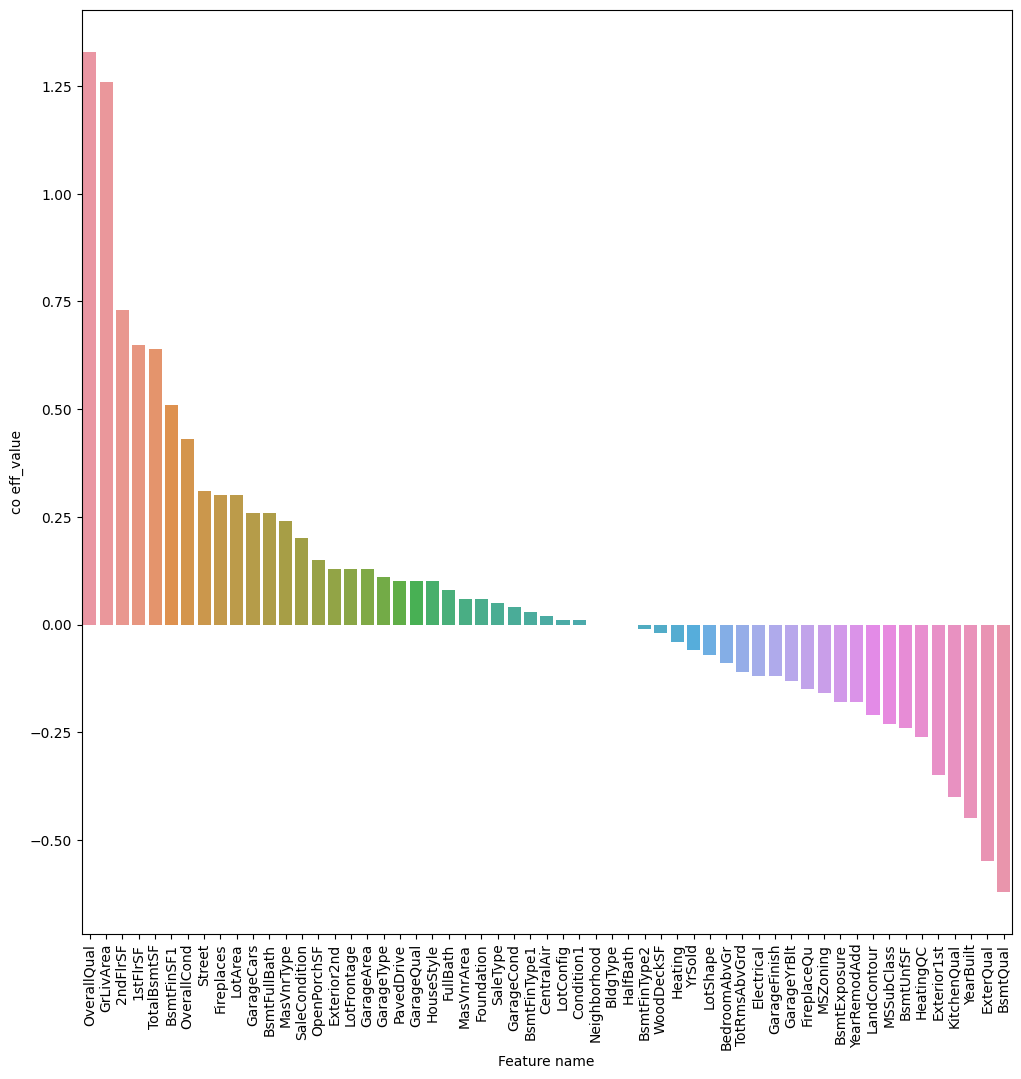

In [ ]:
plt.figure(figsize=(12,12))
sns.barplot(x=elast_model_features_sorted.index,y=elast_model_features_sorted['co eff_value'])
plt.xticks(rotation=90)
plt.show()

#conclusions:

---

**Task 1:- Prepare a complete data analysis report on the given data.**

       given the detailed analysis of all the parameters in the `analysis` section 


---

**Task 2:-     a) Create a robust machine learning algorithm to accurately predict the price of the house given the various factors across the market.**     

      Total of 18 differnt model approches has been made and found `elast model` as the best performing one

**b) Determine the relationship between the house features and how the price varies based on this**
     
     for this the model was checked under different `feature selection` methods and the `mutual info` method is giving the relation of the features with the `saleprice`



---

**Task3:- Come up with suggestions for the customer to buy the house according to the area, price and other requirements.**

      the coeffients of the feature suggest the importance of features as per that model


---




  
